# Package CovRegpy: Regularised Covariance Regression and Forecasting in Python

## Cole van Jaarsveldt, Gareth W. Peters, Matthew Ames, and Mike Chantler

In [12]:
import textwrap
import numpy as np
import pandas as pd
from matplotlib import mlab
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from CovRegpy import cov_reg_given_mean
from CovRegpy_X11 import CovRegpy_X11
from CovRegpy_SSA import CovRegpy_ssa
from CovRegpy_SSD import gaussian, max_bool, CovRegpy_ssd, gaus_param

## Abstract

This paper will outline the functionality available in the CovRegpy package which was written for actuarial
practitioners, wealth managers, fund managers, and portfolio analysts in the language of Python 3.11.
The objective is to develop a new class of covariance regression factor models for covariance forecasting,
along with a library of portfolio allocation tools that integrate with this new covariance forecasting frame-
work. The novelty is in two stages: the type of covariance regression model and factor extractions used
to construct the covariates used in the covariance regression; along with a powerful portfolio allocation
framework for dynamic multi-period asset investment management.
The major contributions of package CovRegpy can be found on the GitHub repository for this library in the
scripts: CovRegpy.py, CovRegpy DCC.py, CovRegpy RPP.py, CovRegpy SSA.py, CovRegpy SSD.py,
and CovRegpy X11.py. These six scripts contain implementations of software features including multi-
variate covariance time series models based on the Regularised Covariance Regression (RCR) framework,
Dynamic Conditional Correlation (DCC) framework, Risk Premia Parity (RPP) weighting functions,
Singular Spectrum Analysis (SSA), Singular Spectrum Decomposition (SSD), and X11 decomposition
framework, respectively.
These techniques can be used sequentially or independently with other techniques to extract implicit fac-
tors to use them as covariates in the RCR framework to forecast covariance and correlation structures and
finally apply portfolio weighting strategies based on the portfolio risk measures based on forecasted covari-
ance assumptions. Explicit financial factors can be used in the covariance regression framework, implicit
factors can be used in the traditional explicit market factor setting and RPP techniques with long/short
equity weighting strategies can be used in traditional covariance assumption frameworks.
We examine, herein, two real-world case studies for actuarial practitioners. The first of these is a modifica-
tion (demonstrating the regularisation of covariance regression) of the original example from Hoff and Niu
(2012) which modelled the covariance and correlative relationship that exists between Forced Expiratory
Volume (FEV) and age and FEV and height. We examine this within the context of making probabilistic
predictions about mortality rates in patients with Chronic Obstructive Pulmonary Disease (COPD).
The second case study is a more complete example using this package wherein we present a funded and
unfunded UK pension example. The decomposition algorithm isolates high-, mid-, and low-frequency
structures from FTSE 100 constituents over 20 years. These are used to forecast the forthcoming quarter’s
covariance structure to weight the portfolio based on the RPP strategy. These fully funded pensions are
compared against the performance of a fully unfunded pension using the FTSE 100 index performance as
a proxy.

**Keywords**: Portfolio Optimisation, Regularised Covariance Regression (RCR), Empirical Mode Decomposition (EMD),
Singular Spectrum Analysis (SSA), Singular Spectrum Decomposition (SSD), X11, Implicit Factors, Risk Premia Parity,
Risk Parity, Long\Short Equity;

## Software Availability

A regularly maintained version catalogue of the software package CovRegpy, as well as detailed
installation instructions and examples for both experienced and new users, can be found here:

[CovRegpy](https://github.com/Cole-vJ/CovRegpy)

## 1. Actuarial Setting and Context

Modern portfolio theory has seen significant developments in the twenty-first century in two separate, but related aspects of portfolio optimisation originally proposed by Markowitz (1952):
- development of assumptions regarding statistical features of financial returns and their
dynamic covariance-correlation relationships, and
- development of various objectives in pursuit of optimal portfolio weightings for positions in
the portfolio based on assumptions made about future forecasts of trend and covariance of
asset returns.

Multivariate dynamic covariance time series models can be split into various families of mod-
els such as multivariate Generalised Auto-regressive Conditional Heteroskedasticity (MGARCH),
Dynamic Conditional Constant Correlation (DCC) and various families of factor models, see a
survey on such models in Bauwens et al. (2006). These models are generally all endogenous
regression models, meaning that they are based on dynamics that arise from a past cross-section
of asset return residuals and white noise drivers to describe structurally the dynamic evolution of
covariance and correlation in the cross-section of asset returns. They have been widely adopted in
many areas of finance and there are reasonable software implementations for most MGARCH and
DCC time series models in R, python and Matlab. Less developed families of multivariate dynamic
volatility models for covariance forecasting are the families of covariance regression factor mod-
els. These are multivariate generalisations of classical factor models such as Capital Asset Pricing
Models (CAPM), Arbitrage Free Pricing Theory (APT) models and extended Fama-French 3- and
5-factor models, see a review in Mateus et al. (2019). Importantly from the perspective of the soft-
ware package developed in CovRegpy, many of the new classes of dynamic factor models that can
be used for covariance forecasting in multivariate asset return time series are not widely available
in packages in R or Matlab. It is, therefore, the intention of this work to propose a new library of
tools that can implement various new extended families of covariance regression factor models for
covariance forecasting, where the emphasis on novelty lies in the choice of factors and new factor
construction approaches which are based on non-linear and non-stationary time series methods,
not yet widely adopted in the wealth management space but are proving to be ushering in a new
wave of multivariate asset covariance forecasting tools. This paper, therefore, seeks to introduce
these tools for actuarial practitioners via a dedicated software library CovRegpy.
Before the recent developments of covariance regression methods such as those in Hoff and
Niu (2012) and the applications in financial settings using these methods such as those in Ames
et al. (2017) and Ames et al. (2018). The most common approach to covariance forecasting
was using either empirical historical sample estimators as predictions based on the past realised
portfolio asset returns covariance estimates (over windows of varying length) used as the best
estimate for the forthcoming covariance. Alternatively, for model-based forecasting methods,
it is common to utilise methods from multivariate time series such as Dynamic Conditional
Correlation Multivariate Generalised Generalized AutoRegressive Conditional Heteroskedasticity
(DCC-MGARCH). It is widely understood that financial markets are often comprised of non-
stationary series that exhibit complex dependence structures that vary depending on the current
state of the economy, macroeconomic outlooks, and many other factors. DCC-MGARCH, whilst attempting to explicitly forecast the covariance, results in a square-root law temporarily growing
covariance structure - as a result the weights will remain the same at any point in the future. That
is, given the DCC-MGARCH forecast 1 day ahead, $ \Sigma_{DCC}(1) $, the DCC-MGARCH forecast t
days ahead will simply be:

\begin{equation}
    \Sigma_{\text{DCC}}(t) = \sqrt{t} \times \Sigma_{\text{DCC}}(1).
\end{equation}

Unlike in DCC-GARCH models, covariance regression frameworks such as those developed in
Hoff and Niu (2012) can be considered in both non-time series and time series contexts. In general,
this method will provide a regression technique for attributing covariance to underlying factors
in a parametric and interpretable manner through the use of a specific type of random-effects
linear regression structure that produces a covariance regression model structure that the user
can specify explicitly and test. In this work, the focus of the covariance regression structure will
be on covariance forecasting in multivariate financial time series settings using a lagged effects
model based on extracted factors that will act as implicit factor covariates when making covariance
forecasts. Numerous regularisations of the original covariance regression of Hoff and Niu (2012)
are presented herein, namely LASSO regression, ridge regression, elastic-net regression, group-
LASSO regression, as well as subgradient descent for optimisation solutions when estimating
of such models in the CovRegpy package. These are all implemented within various speciality
Expectation-Maximisation (EM) estimation frameworks.
Furthermore, this CovRegpy package serves to promote the use of implicit factor extraction
techniques and their integration into covariance regression. This is a newly emerging class of
feature extraction methods proving useful in forecasting covariance of asset returns, though not
yet widely adopted due to a lack of readily available software tools that allow the adoption of
these methods by practitioners. We seek to fill this gap with the CovRegpy package.
Under these implicit factor covariance regression methods, the subsequent covariance fore-
casts can then be utilised in portfolio optimization methods built in the proposed CovRegpy
package, examples include the Risk Premia Parity (RPP) as well as classical Markowitz Mean-
Variance methods (see Markowitz (1952)). Portfolio optimisation methods such as RPP (see
Qian (2005)) are interesting modern portfolio allocation methods that complement traditional
Markowitz Mean-Covariance methods. Portfolio-weighting strategies such as RPP have become
increasingly popular since the subprime mortgage crisis which significantly contributed to the
wider-reaching 2007–2008 global financial crisis. In addition to RPP weighting, long\short equity
weighting rules, introduced in Jacobs and Levy (1993), restrict the cumulative long and short
positions within the portfolio, replicating real-world shorting costs.

## 2. Software Contributions and Context

Despite many innovations in this space, there does not exist very many public-domain, state-of-
the-art packages for the development of these methods for practitioners. The intention of this work
is to develop a public domain freely available software toolbox for state-of-the-art dynamic port-
folio methods that complement other existing packages such as cvxPortfolio, Boyd et al. (2016),
which focuses on different aspects of portfolio optimisation problem compared to the package
proposed. The aforementioned package focuses on various dynamic portfolio settings with a wide
variety of constraints that can be incorporated, whereas the proposed CovRegpy package in this
manuscript focuses on building dynamic covariance regression models using advanced regres-
sion methods as well as state-of-the-art signal decomposition methods that work in non-stationary
settings to extract factors and features to act, for instance, as regression factors.
The state-of-the-art non-stationary and non-linear time series methods adopted in the package
CovRegpy to produce the implicit factor extraction models have all been recently developed, with
an exception being X11 which was developed in Shiskin et al. (1967). The EMD used throughout
this package is based upon a parallel package established for actuarial data analytics in AdvEMDpy
package which was developed in van Jaarsveldt et al. (2023). EMD was originally developed in Huang et al. (1998), Huang (1999), and Huang et al. (1999). SSA developed in Hassani (2007) has
been added to this package with additions like the Kolmogorov-Smirnov test of the distribution of
the errors resulting in Kolmogorov-Smirnov SSA (KS-SSA). Decomposing SSA, named D-SSA,
decomposes the original algorithm and presents the individual components extracted rather than
grouping them as in the original algorithm. SSD, which is a refinement of SSA, was developed in
Bonizzi et al. (2014) and has been added to this package. X11 is introduced in Shiskin et al. (1967)
and further discussed in Sutcliffe (1993) and Doherty (2001). These separate methods included,
and sometimes criticised, herein should not exclusively be thought of as competitors as, owing
to their non-constructive nature, they function very well as complementary algorithms, see van
Jaarsveldt et al. (2021).

## 3. Overview and Structure

The structure of this paper replicates the sequence in which the proposed techniques should be
applied:
- extract factors using implicit factor extraction techniques,
- use $l$-lagged model or explicitly forecast implicit factor,
- use factors to forecast covariance using covariance regression, and
- weight portfolio according to risk appetite.

The following overview and structure is summarised with the associated packages and section in
Figure 1. In Section 4, the implicit factor extraction techniques are described with some descrip-
tive figures. In this section, new approaches to these established techniques are discussed in order
to increase flexibility for financial applications. These new approaches, such as KS-SSA, D-SSA,
L2-SSD, L1-SSD, and ITA-SSD seek to improve flexibility and solve specific problems encoun-
tered when applying the original methods to both synthetic and real-world data. EMD is briefly
discussed in Section 4.2 before moving on to the implicit factor extraction techniques introduced
in this package, namely X11, SSA, and SSD. In Section 4.3, X11 is discussed. In Section 4.4 and
Section 4.5 SSA and SSD are discussed respectively. SSD was originally developed to address
some of the shortcomings of SSA. Both of these techniques still have shortcomings as will be
noted in Sections 4.4 and 4.5.
In Section 5, the first real-world actuarial case study, RCR is presented with its numerous
available algorithmic variations. In Hoff and Niu (2012), the idea of independently estimating
the mean and covariance coefficients is discussed without it being formalised. This Independent
Mean Regularised Covariance Regression (IM-RCR) is formalised in Section 5.3 and in Algorithm 1. This is followed by LASSO RCR, ridge RCR, elastic-net RCR, group-LASSO RCR, and
subgradient optimisation RCR in Sections 5.4, 5.5, 5.6, 5.7, and 5.8, respectively.
Section 5.1 notes the long-term financial benefits of insurers having more accurate knowl-
edge of the prevalence of COPD and other early signs of reduced lung capacity, particularly
after the SARS-CoV-2 Pandemic, regarding policy pricing and the savings of early detection and
indicators compared against expensive late-stage treatment and maintenance. Section 5.2 details
works examining the diagnostic and mortality forecasting abilities of measures of lung capacity.
In Hutchinson (1846) (which cites numerous early works) the diagnostic ability of reduced lung
capacity was already shown to be valuable - this is motivated within Section 5 with the intention
of pricing insurance policies and eventually constructing individual pricing.
Section 6 presents a more complete case study (using more features of this package) in which
the implicit factor extraction techniques are used to isolate different frequency structures from
the daily returns of FTSE 100 stocks. These different frequency structures are used to forecast the
covariance of the stocks over the forthcoming investment horizon. With these covariance forecasts
the portfolios (funded portions of pensions) are weighted based on the RPP strategy. This uses
implicit factor extraction techniques in RCR with RPP weighting. Section 6.1 summarises some
of the shortcomings of either using purely funded or unfunded pensions before the advantages of using hybrid pension schemes to address the demographic changes in developed nations. RPP
portfolio weighting is described in Section 6.3 before the case study constructing hybrid pensions
using the modelling framework from Dutta et al. (2000) with different covariance forecasts and
different risk appetites is presented. This paper is concluded with some closing remarks in Section
7.

<img src="Spider_diagram.png" style="zoom:100%;" />

Figure 1. Flow diagram summarising stages (and providing the respective sub-packages within CovRegpy) of
constructing leveraged risk premia parity portfolios using implicit factor models in a regularised covariance
regression framework with either an l-lagged framework or a formal forecasting framework.

## 4. Implicit Factor Models

In Smith (1776), it was first postulated amongst supporting observations that assets have an
intrinsic value about which their values fluctuate owing to human uncertainty. This formed the
foundational ideas of asset pricing for nearly two centuries. In Sharpe (1964) and Lintner (1965)
the Capital Asset Pricing Model (CAPM) was introduced and despite failing numerous tests, Fama
and French (2004), this model did establish formal asset pricing models as a viable field of study
with actual testable predictions concerning risk and return. This model is the first of what one can
refer to and is referred to herein, as an explicit factor model. It is explicit in the sense that the
factor upon which an asset’s price depends is observable or easily inferable.
Contemporaneously with this explicit factor model, Markowitz (1952) and Tobin (1958) devel-
oped modern portfolio theory as an explanation of the observable diversification in most if not all, real-world portfolios. This development considered both the returns of assets (above some
‘risk-free’ asset as proposed in the CAPM) and the risk of assets (quantified as the covariation
of the various assets). This was necessary and, arguably, vital to the further developments seen in
modern economic theory. In Ross (1976) the Arbitrage Pricing Theorem (APT) was developed,
which is widely considered the natural successor to the CAPM which has had increased success
in its predictive capabilities, see Basu and Chawla (2012).
A further development in this field which arguably combines factor models with traditional
portfolio theory is the usage of principal component analysis (PCA) in the construction of princi-
pal portfolios by applying the technique to either covariances or correlations of sets of assets - the
details of the application thereto are outlined in Jolliffe (1986). Applications of PCA to the finan-
cial industry have varied with Darbyshire (2017) constructing interest rate derivative portfolios
and Pasini (2017) applying the same framework in the construction of equity portfolios. In Yang
(2015) this is further extended to the construction of portfolios of principal portfolios. These prin-
cipal components are the first implicit factors in the sense that their interpretation is less obvious
than CAPM and APT explicit factors.
This section outlines the techniques available in the recently published EMD package,
AdvEMDpy, van Jaarsveldt et al. (2023), and the techniques published in this package, CovRegpy.
These techniques are in contrast to traditional financial factor models such as principal portfo-
lios as a dimensionality reduction technique and an attributable variance model and the explicit
market factor models proposed in Fama and French (1993) and Fama and French (2015) which
relates financial asset prices to several factors - one of which is the difference between the return
of a diversified portfolio of small stocks and the return of a diversified portfolio of large stocks.
Little research has been conducted into the interpretability of these implicit factors or relating
them to easily observable economic factors with a notable exception being van Jaarsveldt et al.
(2021) where an implicit Carbon ETF factor is related to the annual cycle of Carbon dioxide in
the atmosphere.
The explicit factor techniques, while revolutionary, make no attempt to isolate specific time-
frequency structures within the asset basket under observation. The techniques discussed in this
section either implicitly (EMD and X11) or explicitly (SSA and SSD) isolate structures based
on frequency bandwidths and can therefore, to take the model further, be used to construct
horizon-specific portfolios based on one’s requirements and the bandwidths of the components.
An additive synthetic time series has been generated to demonstrate the various available decom-
position techniques in this package. Equation (2) is plotted in Figure 2 demonstrating a synthetic
time series with a noticeable trend and an annual seasonal structure with white noise. With $ t \in \{0, 1, 2, \dots, 120\} $, the synthetic time series is:

\begin{equation}
    x_t = x_{t, \text{trend}} + x_{t, \text{seasonal}} + x_{t, \text{irregular}},
\end{equation}

with

\begin{equation}
    x_{t, \text{trend}} = \frac{1}{100}\times\big(t - 10\big)\times\big(t - 60\big)\times\big(t - 110\big) + 1000,
\end{equation}

and

\begin{equation}
    x_{t, \text{seasonal}} = 100\times\text{sin}\bigg(\frac{2\pi}{12}t\bigg),
\end{equation}

and

\begin{equation}
    x_{t, \text{irregular}} \sim \mathcal{N}(0, 10).
\end{equation}

Section 4.2 demonstrates the results of the application of EMD to the time series described
in Equation (2). We advise the reader to see van Jaarsveldt et al. (2023) for a thorough review
of this algorithm, its algorithmic variations, and the associated software package which also may
produce implicit market factors for use in this algorithm - see Figure 1 for usage context. The
application of X11 to this time series is reviewed in Section 4.3 - the results are less favourable
than in Section 4.2, but the method is much older and has been shown in van Jaarsveldt et al. (2021) to act favourably as a smoother of EMD to form EMD-X11. The base implementation of
the SSA and SSD algorithms to the same synthetic time series is reviewed in Sections 4.4 and
4.5 - the algorithmic extensions to SSA and SSD developed to address some of the shortcomings
discovered in this work are addressed in the supplement.

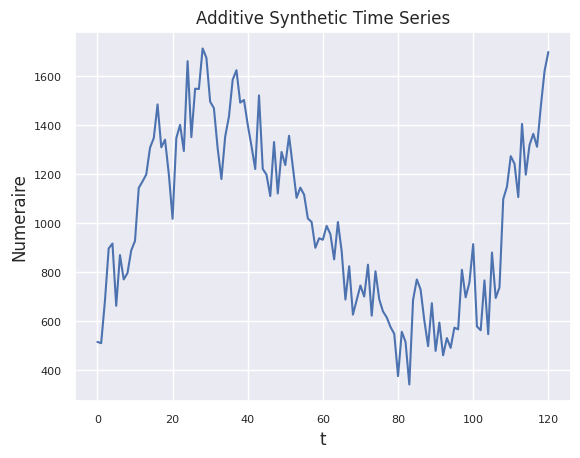

In [2]:
np.random.seed(0)

x11_time = np.linspace(0, 120, 121)
x11_trend_cycle = (1 / 100) * (x11_time - 10) * (x11_time - 60) * (x11_time - 110) + 1000
x11_seasonal = 100 * np.sin((2 * np.pi / 12) * x11_time)
x11_noise = 100 * np.random.normal(0, 1, 121)
x11_time_series = x11_trend_cycle + x11_seasonal + x11_noise

plt.plot(x11_time, x11_time_series)
plt.title('Additive Synthetic Time Series')
plt.xticks([0, 20, 40, 60, 80, 100, 120], fontsize=8)
plt.yticks([400, 600, 800, 1000, 1200, 1400, 1600], fontsize=8)
plt.ylabel('Numeraire')
plt.xlabel('t')
plt.show()

Figure 2. Additive synthetic time series described in Equations (2), (3), (4), and (5), used to demonstrate implicit
factor extraction methods in this section which consists of a trend-cycle, seasonal, and irregular component.

### 4.1 Additive and Multiplicative Time Series

In Derman and Kani (1994), Dupire (1994), and Rubinstein (1994) it is postulated that the volatil-
ity of assets is not only time-inhomogeneous, but it is also a function of the prices of the assets
themselves or, by extension, the recent changes in the asset prices - this is inline with modern
probability default models that agree that the momentum of the underlying factors is non-trivial
in their predictive capabilities. This follows logically as high prices or recent large increases in
asset prices often foreshadow periods of heightened uncertainty and, therefore, volatility. These
assumptions are not without criticism with Dumas et al. (1998) performing an extensive empir-
ical study that concludes that these models are indistinguishable from smoothed versions of the
implied volatility model proposed in Black and Scholes (1973).
With this context, it is natural to also explore multiplicative models where seasonality and trend
components (and further less-easily named or interpretable components isolable using SSA and
SSD within the CovRegpy package and EMD in the AdvEMDpy package) are multiplied onto
some underlying trend. The framework in this paper is also well-suited for multiplicative models,
provided that one uses an appropriate transform such as the natural logarithm as demonstrated in
Equation (6):

\begin{equation}
\begin{split}
     x_t &= x_{t, \text{trend}} \times x_{t, \text{seasonal}} \times x_{t, \text{irregular}}\\
     \text{log}(x_t) &= \text{log}(x_{t, \text{trend}}) + \text{log}(x_{t, \text{seasonal}}) + \text{log}(x_{t, \text{irregular}}).
\end{split}
\end{equation}

### 4.2 Empirical Mode Decomposition

Based on work done in Huang et al. (1998), Huang (1999), Huang et al. (1999), van Jaarsveldt
et al. (2023), and van Jaarsveldt et al. (2021), it can be stated with some confidence that EMD
and the various algorithmic variations summarised and presented in van Jaarsveldt et al. (2023)
presents a class of robust trend estimation and decomposition algorithm that are state-of-the-art when working with general stochastic processes including potential non-stationarity and non-
linearity. The algorithm, Algorithm 1, presented in pseudo-code in Appendix A, of Supplement
to: Package CovRegpy: Regularised Covariance Regression and Forecasting in Python, was first
presented in van Jaarsveldt et al. (2023). The two conditions that each component isolated using
EMD, named intrinsic mode functions (IMFs), must satisfy are listed in C1 and C2. An additional,
optional (and highly recommended) condition, C3, is referred to as a stopping criterion and is
checked after the initial two conditions are checked. This prevents over-sifting and the propagation
of errors through successive IMF components with the conditions listed below:

### Condition 1 (C1):

\begin{equation}
\text{abs}\bigg(\Big|\Big\{\frac{d\gamma_k(t)}{dt} = 0 : t \in (0, T)\Big\}\Big| - \Big|\Big\{\gamma_k(t) = 0 : t \in (0, T)\Big\}\Big|\bigg) \leq 1,
\end{equation}

### Condition 2 (C2):

\begin{equation}
\sum_t\text{abs}\big(\tilde{\gamma}^{\mu}_k(t) \big) \leq \epsilon_2, \text{ and}
\end{equation}

### Condition 3 (C3):

\begin{equation}
SD_{(p,q)} = \sum_t \Bigg[\dfrac{\big|(h_{(p,q-1)}(t) - h_{(p,q)}(t))\big|^2}{h^2_{(p,q-1)}(t)}\Bigg] < \epsilon_3.
\end{equation}

In C1, $ \gamma_k(t) $ is the k$^{th}$ IMF component and with $ |\{\cdot\}| $ being the cardinality set. In C2, $ \tilde{\gamma}^{\mu}_k(t) $ is the mean of the k$^{th}$ IMF and in C3, $ h_{(p,q)}(t) $ is the q$^{th}$ iteration of the algorithm for the p$^{th}$ IMF. The
final result of the sifting presented in Algorithm 1 is:

\begin{equation}
	x_{\text{IMF}}(t) = \sum_{k=1}^{K}\gamma_k(t) + r_K(t).
\end{equation}

As mentioned, EMD refers exclusively to the sifting procedure, whereas the Hilbert-Huang trans-
form (HHT) refers to both EMD (the sifting procedure) followed by the Hilbert transform. The
Hilbert transform of k$^{th}$ IMF can be seen in Equation (8):

\begin{equation} \label{Hilbert_transform}
\check{\gamma}_k(t) = \mathcal{HT}[\gamma_k(t)] = \frac{1}{\pi}PV\int_{-\infty}^{\infty}\dfrac{\gamma_k(t^*)}{t - t^*}dt^*,
\end{equation}

with PV being the Cauchy Principle Value integral. This is an improper integral that assigns a
value to an improper integral where there exists a discontinuity. The Hilbert transform in Equation
(8) can be expanded to Equation (9):

\begin{equation} \label{Hilbert_transform_expand}
\check{\gamma}_k(t) = \frac{1}{\pi}\lim_{\epsilon\rightarrow{0}^+}\bigg[\int_{t - \frac{1}{\epsilon}}^{t - \epsilon}\dfrac{\gamma_k(t^*)}{t - t^*}dt^* + \int_{t^* + \epsilon}^{t + \frac{1}{\epsilon}}\dfrac{\gamma_k(t^*)}{t - t^*}dt^*\bigg].
\end{equation}

With the Hilbert transform of the time series defined as in Equation (9), the analytical signal can
then be defined as in Equation (10):

\begin{equation} \label{eq:analytical}
\gamma^a_k(t) = \gamma_k(t) + i\check{\gamma}_k(t) = a(t)e^{i\theta(t)}= a(t)e^{i\int\omega(t)dt},
\end{equation}

with the instantaneous amplitude being defined as in Equation (11):

\begin{equation} \label{eq:instantaneous_amplitude}
a(t) = \sqrt{\gamma_k(t)^2 + \check{\gamma}_k(t)^2},
\end{equation}

and the phase being:

\begin{equation}
\theta(t) = \text{tan}^{-1}\left(\frac{\check{\gamma}_k(t)}{\gamma_k(t)}\right).
\end{equation}

The instantaneous frequency can then be defined as in Equation (13):

\begin{equation} \label{IF_equation}
\omega(t) = \frac{d\theta(t)}{dt}.
\end{equation}

### 4.3 X11

X11 was originally proposed in Shiskin et al. (1967). This algorithm is the focus of
CovRegpy X11.py. A disadvantage of X11 when compared against EMD is that it is less flexible
in that it can only extract three structures namely the trend-cycle component, seasonal compo-
nent, and the irregular component. Each of these components is individually less flexible than an
IMF from EMD. The irregular component would, in most real-world scenarios, contain additional
meaningful structural information that is regarded as noise in X11. Many shortcomings of the
method are discussed in Sutcliffe (1993) and Doherty (2001).
The Henderson symmetric weights proposed in Henderson (1916), Whittaker (1922), and
Henderson (1924) are used in the X11 algorithm. The edges of the time series present problems for
the symmetric weighting procedure. Two common solutions are proposed. As in Dagum (1980),
Dagum (1988), Dagum (1996), and Findley et al. (1998) the Autoregressive Integrated Moving
Average (ARIMA) model is used to explicitly forecast the edge of the time series so that the sym-
metric weights can still be used. An alternative to this without explicitly forecasting the time series
involves calculating a set of asymmetric weights. Classical asymmetric weights are calculated in
Musgrave (1964b) and Musgrave (1964a) with the Reproducing Kernel Hilbert Space derivation
of these weights being done Bianconcini (2006), Dagum and Bianconcini (2006), and Dagum and
Bianconcini (2008). X11 decomposes the times series as:

\begin{equation}
    x(t) = T(t) + S(t) + \epsilon(t),
\end{equation}

with $ T(t) $, $ S(t) $, and $ \epsilon(t) $ being the trend-cycle component, seasonal component, and irregular component, respectively. The symmetric moving average of order $ k $, $ \text{ma}_k(\cdot) $, is defined as:

\begin{equation}
    \text{ma}_k(x(t_h)) = \frac{1}{2(k-1)}x\Big(t_{h-\frac{(k-1)}{2}}\Big) + \sum_{a=-\frac{(k-2)}{2}}^{\frac{(k-2)}{2}}\frac{1}{k-1}x(t_{h+a}) + \frac{1}{2(k-1)}x\Big(t_{h+\frac{(k-1)}{2}}\Big),
\end{equation}

with $ x(t_h) $ being the $ h^{th} $ time series component. The symmetric seasonal moving average of order $ m\times{n} $, $ S_{\{{m\times{n}}, c\}}(\cdot) $, is defined as:

\begin{equation}
\begin{split}
    S_{\{{m\times{n}}, c\}}(x(t_h)) &= \frac{1}{mn}x\Big(t_{h-\frac{c((n-1)+(m-1))}{2}}\Big) + \frac{2}{mn}{\sum}_{b=-\frac{c((n-1)+(m-1)-2)}{2}}^{-\frac{c(n-1)}{2}}x(t_{h+b})\\
    &+ {\sum}_{b=-\frac{c(n-3)}{2}}^{\frac{c(n-3)}{2}}\frac{1}{n}x(t_{h+b}) + \frac{2}{mn}{\sum}^{\frac{c((n-1)+(m-1)-2)}{2}}_{b=\frac{c(n-1)}{2}}x(t_{h+b})\\
    &+ \frac{1}{mn}x\Big(t_{h+\frac{c((n-1)+(m-1))}{2}}\Big),
\end{split}
\end{equation}

with $ c $ being a parameter that depends upon both the sampling rate of the time series and the calculated seasonality of the time series. An example is that if the time series is sampled monthly and the seasonality is expected to be quarterly, then $ c = 3 $. The Henderson moving average of order $ l $, $ \text{Hma}_l(\cdot) $, is as in Henderson (1916), Whittaker (1922), Henderson (1916), Bianconcini
(2006), Dagum and Bianconcini (2006), and Dagum and Bianconcini (2008). An example of the application of the code can be seen below:

Figure 3 demonstrates the result of applying the X11 method in CovRegpy X11 to the additive
synthetic time series, Figure 2, described in Section 4 using the parameters as shown in the code
above. The trend-cycle component, seasonal component, and random error component are sepa-
rated from one another, but the noise persists in the system owing to the lack of formal frequency
bandwidth or distribution approaches to the decomposition as will be formally demonstrated in
Section 4.5. The three components visible in Figure 3 result from applying the above code snippet
to the time series presented in Equation (2) and plotting each component with its corresponding
underlying target time series component.

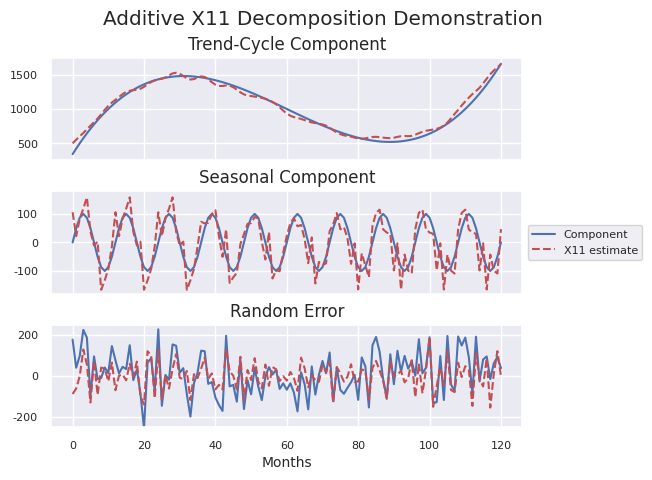

In [3]:
x11_decomp = CovRegpy_X11(x11_time, x11_time_series, seasonal_factor='3x3',
                          trend_window_width_1=13, trend_window_width_2=13, trend_window_width_3=13)

fig, axs = plt.subplots(3, 1)
plt.subplots_adjust(hspace=0.3)
fig.suptitle('Additive X11 Decomposition Demonstration')
axs[0].plot(x11_time, x11_trend_cycle)
axs[0].plot(x11_time, x11_decomp[0], 'r--')
axs[0].set_xticks([0, 20, 40, 60, 80, 100, 120])
axs[0].set_xticklabels(['', '', '', '', '', '', ''])
axs[0].set_yticks([500, 1000, 1500])
axs[0].set_yticklabels(['500', '1000', '1500'], fontsize=8)
axs[0].set_ylim(250, 1750)
axs[0].set_title('Trend-Cycle Component')
box_0 = axs[0].get_position()
axs[0].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.95, box_0.height])
axs[1].plot(x11_time, x11_seasonal, label='Component')
axs[1].plot(x11_time, x11_decomp[1], 'r--', label='X11 estimate')
axs[1].set_xticks([0, 20, 40, 60, 80, 100, 120])
axs[1].set_xticklabels(['', '', '', '', '', '', ''])
axs[1].set_yticks([-100, 0, 100])
axs[1].set_yticklabels(['-100', '0', '100'], fontsize=8)
axs[1].set_ylim(-180, 180)
axs[1].set_title('Seasonal Component')
box_1 = axs[1].get_position()
axs[1].set_position([box_1.x0 - 0.05, box_1.y0, box_1.width * 0.95, box_1.height])
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
axs[2].plot(x11_time, x11_noise)
axs[2].plot(x11_time, x11_decomp[2], 'r--')
axs[2].set_xticks([0, 20, 40, 60, 80, 100, 120])
axs[2].set_xticklabels(['0', '20', '40', '60', '80', '100', '120'], fontsize=8)
axs[2].set_yticks([-200, 0, 200])
axs[2].set_yticklabels(['-200', '0', '200'], fontsize=8)
axs[2].set_ylim(-250, 250)
axs[2].set_xlabel('Months', fontsize=10)
axs[2].set_title('Random Error')
box_2 = axs[2].get_position()
axs[2].set_position([box_2.x0 - 0.05, box_2.y0, box_2.width * 0.95, box_2.height])
plt.show()

Figure 3. X11 time series decomposition of synthetic additive time series into trend-cycle component, seasonal
component, and random error or noise component.

### 4.4 Singular Spectrum Analysis

SSA, as presented in Hassani (2007), can be separated into four stages, namely Embedding,
Singular Value Decomposition, Grouping, and Diagonal Averaging which will be presented in
Sections 4.4.1, 4.4.2, 4.4.3, and 4.4.4 respectively. In Section 9.1.1 of Supplement to: Package
CovRegpy: Regularised Covariance Regression and Forecasting in Python, Decomposing Singular
Spectrum Analysis (D-SSA) is introduced and in Section 9.1.2 of “Supplement to: Package
CovRegpy: Regularised Covariance Regression and Forecasting in Python”, Kolmogorov-
Smirnov Singular Spectrum Analysis (KS-SSA) is introduced. D-SSA and KS-SSA have been
developed during this research to modify SSA to develop a more robust decomposition technique.
D-SSA seeks to construct a decomposing version of SSA, whereas KS-SSA was developed to
optimise and automate the isolation of a trend amongst white noise - the assumption underpinning
this technique is that the errors have a Gaussian distribution.

#### 4.4.1 Embedding in SSA

The first step involves converting the univariate time series into a multivariate time series by embedding lagged increments of the original univariate time series to create matrix $ \boldsymbol{X} $ such that:

\begin{equation}
    \boldsymbol{X} = [\boldsymbol{X}_1(t), \dots, \boldsymbol{X}_K(t)],
\end{equation}

with $ \boldsymbol{X}_j(t) = [x(t_j), \dots, x(t_{j + L - 1})]^T $ and $ K = T - L + 1 $. $L$ is the embedding dimension that determines the structures being isolated and becomes increasingly relevant in the algorithmic variations and methodological extension of SSA, namely SSD (discussed in the next section), for purposes such as removing the initial trend structure.

#### 4.4.2 Singular Value Decomposition in SSA

This is followed by the singular value decomposition (SVD) of the matrix $ \boldsymbol{X} $ resulting in $ \boldsymbol{\lambda} = (\lambda_1, \dots, \lambda_L) $ and $ \textbf{U} = [\textbf{U}_1, \dots, \textbf{U}_L] $ being the vector of eigenvalues in descending order ($ \lambda_1 < \dots < \lambda_L $) and their corresponding eigenvectors, respectively. With $ \textbf{V}_j = {\boldsymbol{X}^T}\textbf{U}_j/\sqrt{\lambda_j} $, $ \boldsymbol{X} $ is decomposed as:

\begin{equation} \label{eq:SVD}
    \boldsymbol{X} = \sum^L_{j=1}{\boldsymbol{X}_j},
\end{equation}

where $ \boldsymbol{X}_j = \sqrt{\lambda}_j{\textbf{U}_j}{\textbf{V}^T_j} $. Equation (18) demonstrates the decomposition of the embedding matrix in Equation (17). In the absence of rounding errors, Equation (18) should precisely reproduce th
time series after a reversal of the embedding step.

#### 4.4.3 Grouping in SSA

With $ \boldsymbol{I} $ being a subset of indices such that $ \boldsymbol{I} = \{i_1, \dots, i_p\} \subset \{1, \dots, L\} = \boldsymbol{L} $, the trend is estimated using a user-selected subset of $ \boldsymbol{L} $, but in practice to estimate the trend, owing to the exponential decay of the eigenvalue, only the first few indices are used:

\begin{equation}
    \boldsymbol{X}_{\boldsymbol{I}} = \sum_{\boldsymbol{I}} \boldsymbol{X}_j.
\end{equation}

Theoretically, any subset in $ \mathcal{P}(\boldsymbol{L}) $ can be used to estimate the trend, but as the eigenvalues monotonically decrease, the amount of variation, and therefore information, in each subsequent $ \boldsymbol{X}_j $ decreases exponentially. It is this step that is adjusted in Section 9.1.1 of ``Supplement to: Package CovRegpy: Regularised Covariance Regression and Forecasting in Python" to produce the Decomposing SSA (D-SSA) by keeping the components separate before performing the following step on individual components before grouping them based on the user's requirements such as a pure trend estimate or an evaluation of different cyclical components.

#### 4.4.4 Diagonal Averaging in SSA

This final step is, in summary, a reversal of the embedding step. By appropriately defining a vector
such that the lagged embedding of Equation (17) is reversed so that an appropriate averaging can
take place. With this vector, $ X_{I}[i] $, defined as in Equation (20):

\begin{equation}  \label{eq:embed_reverse}
    X_{I}[i] = \sum_{r+c=i}\boldsymbol{X}_{I}[r,c],
\end{equation}

with the trend estimation then proceeding by using an appropriate averaging vector to reverse the
lagged embedding:

\begin{equation}
    x_{SSA}(t) = \sum_{i=1}^{p-1}\frac{(p+1)-i}{p}X_{I}[i] + \sum_{i=p}^{L-p}\frac{1}{p}X_{I}[i] + \sum_{i=L-p+1}^{L}\frac{(L-i)}{p}X_{I}[i].
\end{equation}

In the original SSA, as proposed in Hassani (2007), the only input variables used in the code
above are time series, L, and est. The time series (time series) is required as well as the
embedding dimension (L) and the grouping factor (est). One variation on the original algorithm
can be noted as the second output of the algorithm which is time series decomp. Rather than
automatically group the structures, as in time series est, time series decomp stores each of
the structures sequentially for the user’s convenience.

An example of the D-SSA output (time series decomp) is plotted in Figure 4. One is advan-
taged in this synthetic example in that one has foreknowledge of the underlying structures, but
this would not necessarily hold when applied to real-world examples. The various components
extracted can be seen against their corresponding underlying components in Figure 4. The addi-
tional inputs in the above code will be discussed in the Supplement to: Package CovRegpy:
Regularised Covariance Regression and Forecasting in Python.

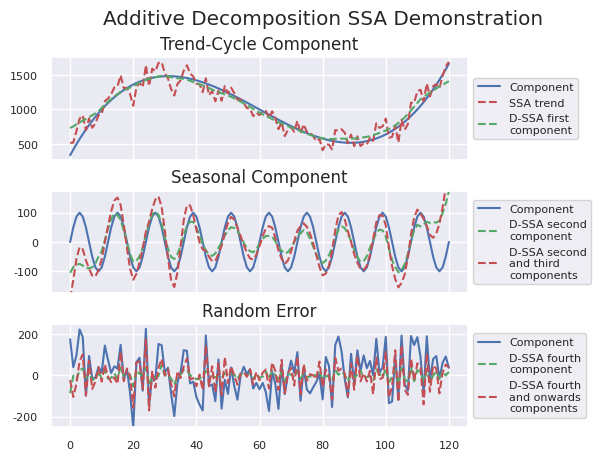

In [4]:
np.random.seed(0)

time = np.linspace(0, 120, 121)
trend_cycle = (1 / 100) * (time - 10) * (time - 60) * (time - 110) + 1000
seasonal = 100 * np.sin((2 * np.pi / 12) * time)
noise = 100 * np.random.normal(0, 1, 121)
time_series = trend_cycle + seasonal + noise

ssa_decomp = CovRegpy_ssa(time_series, L=10, est=8)

fig, axs = plt.subplots(3, 1)
plt.subplots_adjust(hspace=0.3)
fig.suptitle('Additive Decomposition SSA Demonstration')
axs[0].plot(time, trend_cycle, label='Component')
axs[0].plot(time, ssa_decomp[0], 'r--', label='SSA trend')
axs[0].plot(time, ssa_decomp[1][0, :], 'g--', label=textwrap.fill('D-SSA first component', 12))
axs[0].set_xticks([0, 20, 40, 60, 80, 100, 120])
axs[0].set_xticklabels(['', '', '', '', '', '', ''], fontsize=8)
axs[0].set_yticks([500, 1000, 1500])
axs[0].set_yticklabels(['500', '1000', '1500'], fontsize=8)
axs[0].set_title('Trend-Cycle Component')
box_0 = axs[0].get_position()
axs[0].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.84, box_0.height])
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
axs[1].plot(time, seasonal, label='Component')
axs[1].plot(time, ssa_decomp[1][1, :], 'g--', label=textwrap.fill('D-SSA second component', 12))
axs[1].plot(time, ssa_decomp[1][1, :] + ssa_decomp[1][2, :], 'r--',
            label=textwrap.fill('D-SSA second and third components', 12))
axs[1].set_xticks([0, 20, 40, 60, 80, 100, 120])
axs[1].set_xticklabels(['', '', '', '', '', '', ''], fontsize=8)
axs[1].set_yticks([-100, 0, 100])
axs[1].set_yticklabels(['-100', '0', '100'], fontsize=8)
axs[1].set_ylim(-175, 175)
axs[1].set_title('Seasonal Component')
box_1 = axs[1].get_position()
axs[1].set_position([box_1.x0 - 0.05, box_1.y0, box_1.width * 0.84, box_1.height])
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
axs[2].plot(time, noise, label='Component')
axs[2].plot(time, ssa_decomp[1][3, :], 'g--', label=textwrap.fill('D-SSA fourth component', 12))
axs[2].plot(time, np.sum(ssa_decomp[1][3:, :], axis=0), 'r--',
            label=textwrap.fill('D-SSA fourth and onwards components', 12))
axs[2].set_xticks([0, 20, 40, 60, 80, 100, 120])
axs[2].set_xticklabels(['0', '20', '40', '60', '80', '100', '120'], fontsize=8)
axs[2].set_yticks([-200, 0, 200])
axs[2].set_yticklabels(['-200', '0', '200'], fontsize=8)
axs[2].set_ylim(-250, 250)
axs[2].set_title('Random Error')
box_2 = axs[2].get_position()
axs[2].set_position([box_2.x0 - 0.05, box_2.y0, box_2.width * 0.84, box_2.height])
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.show()

Figure 4. SSA and D-SSA trend estimate and component isolation compared against the corresponding
underlying structures.

### 4.5 Singular Spectrum Decomposition

In this section SSD, originally introduced in Bonizzi et al. (2014), is discussed and several algo-
rithmic variations are also introduced. This technique is available to the user in CovRegpy SSD.py
as well as the algorithmic variations. For a detailed description of the modifications made to SSA
to create SSD see Bonizzi et al. (2014). In summation, the major adjustments are the creation and
automation of the extraction of a trend described in Section 4.5.1 and the formal extraction of
components based on defined narrow bandwidths as described in Section 4.5.2.

#### 4.5.1 Dealing with Trended Decomposition in the Presence of a Significant Trend

Unlike in SSA, there is a formal test for a significant trend before the remainder of the decomposition algorithm is performed. If the normalised maximum frequency ($f_{\text{max}}/F_s$) is below some threshold, the time series is deemed to have a significant trend. In  Bonizzi et al. (2014) the frequency threshold is set to $ f_{threshold}=10^{-3} $. If this threshold is satisfied, then $L$ is set to $T/3$ to isolate the trend. This follows that done in Vautard et al. (1992). If this threshold is not met, the embedding dimension, $L$, is set to $1.2F_s/f_{\text{max}}$.

#### 4.5.2 Downsampling in Singular Spectrum Decomposition

This process can be summarised as calculating a frequency band which will be used to down-
sample the possibly detrended time series. By constructing three Gaussian functions such that:

\begin{equation} \label{Gaussian_func}
    \gamma(f, \theta) = \sum_{i=1}^3{A_i}e^{-\frac{(f-\mu_i)^2}{2\sigma_i^2}},
\end{equation}

with the $ \mu $ parameters, and therefore, the centres of the Gaussian functions to be fitted to the power spectral density (PSD), being fixed and defined as:

\begin{equation} \label{eq:mu}
    \mu_1 = f_{\text{max}},\text{  }\mu_2 = f_2,\text{  }\mu_3 = \frac{f_{\text{max}} + f_2}{2},
\end{equation}

where $ f_{\text{max}} $ is the frequency at which  the maximum power spectral density mode is located and $ f_2 $ is the frequency at which the second-highest power spectral density mode is located, with the other parameters being initialised as:

\begin{equation} \label{eq:optimise_parameters}
\begin{array}{lcl}
    A^{(0)}_1 = \frac{1}{2}PSD(f_{\text{max}}), &\text{  }&\sigma^{(0)}_1 = f:PSD(f) = \frac{2}{3}PSD(f_{\text{max}}),\\
    A^{(0)}_2 = \frac{1}{2}PSD(f_2), &\text{  }&\sigma^{(0)}_2 = f:PSD(f) = \frac{2}{3}PSD(f_2),\\
    A^{(0)}_3 = \frac{1}{4}PSD(f_3), &\text{  }&\sigma^{(0)}_3 = 4|f_{\text{max}} - f_2|,
\end{array}
\end{equation}

where $ \sigma^{(0)}_1 = f:PSD(f) = \frac{2}{3}PSD(f_{\text{max}}) $ denotes the frequency at which the PSD is equal to two-thirds of the power spectral density of the maximum power spectral density mode nearest to the maximum power spectral density - this allows for probable asymmetric peaks in the PSD.

**L1 Singular Spectrum Decomposition**: With $ \mu_1 $, $ \mu_2 $, and $ \mu_3 $ fixed, Equation (22) can be fitted using least absolute shrinkage and selection operator (LASSO) regression as in Equation (25). In practice, L1 SSD can result in a perpetual loop if not managed correctly and should be used with caution.

\begin{equation} \label{eq:SSD_L1}
    \text{min}_{\theta} ||\gamma(f, \theta) - \text{PSD}(f)||_1.
\end{equation}

**L2 Singular Spectrum Decomposition**: With $ \mu_1 $, $ \mu_2 $, and $ \mu_3 $ fixed, Equation (22) can be fitted can be fitted using ridge regression as in Equation (26). This is the preferred method as LASSO regression promotes scarcity and in the event of the $ \theta $ vector being optimised to be identically zeros, without a counting stopping criterion, would result in an infinite loop.

\begin{equation} \label{eq:SSD_L2}
    \text{min}_{\theta} ||\gamma(f, \theta) - \text{PSD}(f)||^2_2.
\end{equation}

Once Equation (22) has been fitted to the PSD, the optimal frequency band is calculated as $ (f_{\text{max}} - \delta{f}, f_{\text{max}} + \delta{f}) $ where $ \delta{f} $ is calculated as in Equation (27).

\begin{equation} \label{eq:delta}
    \delta{f} = 2.5\sigma_1^{opt}.
\end{equation}

This frequency band is demonstrated in Figure 6. Figures, such as Figures 5 and 6, can be option-
ally output when running the code below if one has plot=True which outputs every incremental
PSD fitting process.

#### 4.5.3 Stopping Criterion in Singular Spectrum Decomposition

To prevent over-sifting (a word borrowed from EMD, but accurately summarises the concept), one
should introduce a stopping criterion that stops the algorithm after a certain number of components
have been isolated. The SSD algorithm results in the following decomposition:

\begin{equation}
    x_{SSD}(t) = \sum_{i=1}^{M}\tilde{g}_i(t) + v_{M+1}(t),
\end{equation}

with $ \tilde{g}_i(t) $ being the $ i^{th} $ component and $ v_{M+1}(t) $ being the residual. This stopping criterion stops the algorithm when a certain percentage of the power spectral density of the time series has been accounted for in the formal components extracted. The algorithm stops when the normalised mean squared error (NMSE), calculated as follows:

\begin{equation}
    NMSE_i = \sum^{N}_{t=0}\frac{v_{(i+1)}^2(t)}{x^2(t)},
\end{equation}

drops below a certain percentage. A value of $ \alpha=0.01 $ is recommended in Bonizzi et al. (2014), but is adjustable in this package. The time series (time_series) is the sole input required for the algorithm with the other additional inputs required being initial_trend_ratio, nmse_threshold, plot, and debug.

The nmse threshold value has been discussed in this section with initial trend ratio
being discussed in Section 9.2.3 of Supplement to: Package CovRegpy: Regularised Covariance
Regression and Forecasting in Python. The plot=True input variable results in numerous incre-
mental plots such as Figure 5 and Figure 6. If debug=True then each incremental value of the
calculated $ NMSE_i $ will be printed for debugging purposes.

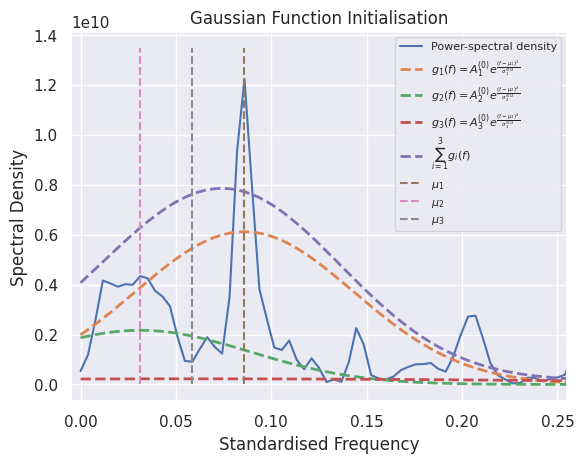

In [6]:
np.random.seed(0)

x11_time = np.linspace(0, 120, 121)
x11_trend_cycle = (1 / 100) * (x11_time - 10) * (x11_time - 60) * (x11_time - 110) + 1000
x11_seasonal = 100 * np.sin((2 * np.pi / 12) * x11_time)
x11_noise = 100 * np.random.normal(0, 1, 121)
x11_time_series = x11_trend_cycle + x11_seasonal + x11_noise

dt = (24 * 60 * 60)
initial_trend_ratio=10.0

trend_est = \
    CovRegpy_ssa(time_series=np.asarray(x11_time_series),
                 L=int(len(np.asarray(x11_time_series)) / initial_trend_ratio), est=1)[0]

time_series_resid = x11_time_series - trend_est
s, f = mlab.psd(np.asarray(time_series_resid), Fs=1 / dt)

mu_1 = f[s == max(s)] * dt
A_1 = (1 / 2) * s[s == max(s)]
sigma_1 = (2 / 3) * f[((2 / 3) * s[s == max(s)] - s) == min((2 / 3) * s[s == max(s)] - s)] * dt
gaus_1 = gaussian(f * dt, A_1, mu_1, sigma_1)

mu_2 = f[s == np.sort(s[max_bool(s)])[-2]] * dt
A_2 = (1 / 2) * s[s == np.sort(s[max_bool(s)])[-2]]
sigma_2 = (2 / 3) * f[((2 / 3) * s[s == np.sort(s[max_bool(s)])[-2]] - s)
                      == min((2 / 3) * s[s == np.sort(s[max_bool(s)])[-2]] - s)] * dt
gaus_2 = gaussian(f * dt, A_2, mu_2, sigma_2)


mu_3 = (mu_1 + mu_2) / 2
A_3 = np.asarray([(1 / 4) * s[np.abs(f * dt - mu_3) == min(np.abs(f * dt - mu_3))][0]])
sigma_3 = 4 * np.abs(mu_1 - mu_2)
gaus_3 = gaussian(f * dt, A_3, mu_3, sigma_3)

plt.title('Gaussian Function Initialisation')
plt.plot(f * dt, s, label='Power-spectral density')
plt.plot(f * dt, gaus_1, '--', label=r'$g_1(f) = A_1^{(0)}e^{\frac{(f-\mu_1)^2}{\sigma^{(0)2}_1}}$', linewidth=2)
plt.plot(f * dt, gaus_2, '--', label=r'$g_2(f) = A_2^{(0)}e^{\frac{(f-\mu_2)^2}{\sigma^{(0)2}_2}}$', linewidth=2)
plt.plot(f * dt, gaus_3, '--', label=r'$g_3(f) = A_3^{(0)}e^{\frac{(f-\mu_3)^2}{\sigma^{(0)2}_3}}$', linewidth=2)
plt.plot(f * dt, gaus_1 + gaus_2 + gaus_3, '--',
         label=r'$\sum_{i=1}^{3}g_i(f)$', linewidth=2)
plt.plot(mu_1 * np.ones(100), np.linspace(np.min(s), 1.1 * np.max(s), 100), '--', label=r'$\mu_1$')
plt.plot(mu_2 * np.ones(100), np.linspace(np.min(s), 1.1 * np.max(s), 100), '--', label=r'$\mu_2$')
plt.plot(mu_3 * np.ones(100), np.linspace(np.min(s), 1.1 * np.max(s), 100), '--', label=r'$\mu_3$')
plt.legend(loc='best', fontsize=8)
plt.xlabel('Standardised Frequency')
plt.ylabel('Spectral Density')
plt.xlim(-0.005, 0.255)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
plt.show()

Figure 5. Initialisation of Gaussian functions, Equation (22), to be fitted to the PSD of the additive synthetic
example presented in Figure 2 for downsampling in SSD.

/tmp/ipykernel_11959/2457063005.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x0[0] = A_1
/tmp/ipykernel_11959/2457063005.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x0[1] = A_2
/tmp/ipykernel_11959/2457063005.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x0[2] = A_3
/tmp/ipykernel_11959/2457063005.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single eleme

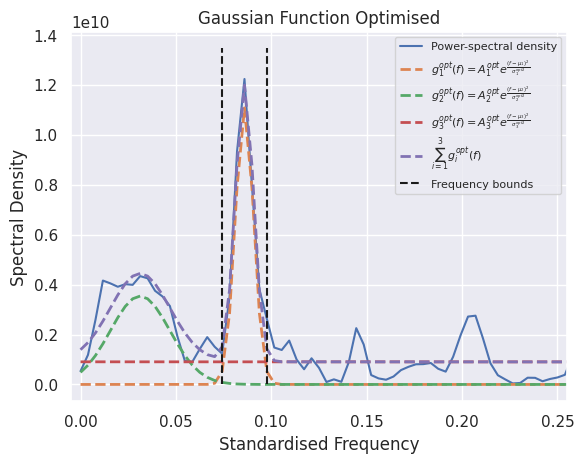

In [7]:
x0 = np.zeros(6)
x0[0] = A_1
x0[1] = A_2
x0[2] = A_3
x0[3] = sigma_1
x0[4] = sigma_2
x0[5] = sigma_3

thetas = gaus_param(x0, f * dt, mu_1, mu_2, mu_3, s, method='l2').x
f_range = [(mu_1 - 2.5 * thetas[3])[0], (mu_1 + 2.5 * thetas[3])[0]]

plt.title('Gaussian Function Optimised')
plt.plot(f * dt, s, label='Power-spectral density')
plt.plot(f * dt, gaussian(f * dt, thetas[0], mu_1[0], thetas[3]),
         '--', label=r'$g^{opt}_1(f) = A_1^{opt}e^{\frac{(f-\mu_1)^2}{\sigma^{opt2}_1}}$', linewidth=2)
plt.plot(f * dt, gaussian(f * dt, thetas[1], mu_2[0], thetas[4]),
         '--', label=r'$g^{opt}_2(f) = A_2^{opt}e^{\frac{(f-\mu_2)^2}{\sigma^{opt2}_2}}$', linewidth=2)
plt.plot(f * dt, gaussian(f * dt, thetas[2], mu_3[0], thetas[5]),
         '--', label=r'$g^{opt}_3(f) = A_3^{opt}e^{\frac{(f-\mu_3)^2}{\sigma^{opt2}_3}}$', linewidth=2)
plt.plot(f * dt, gaussian(f * dt, thetas[0], mu_1[0], thetas[3]) +
         gaussian(f * dt, thetas[1], mu_2[0], thetas[4]) +
         gaussian(f * dt, thetas[2], mu_3[0], thetas[5]), '--',
         label=r'$\sum_{i=1}^{3}g^{opt}_i(f)$', linewidth=2)
plt.plot(f_range[0] * np.ones(101), np.linspace(0, 1.1 * 2 * A_1, 101), 'k--')
plt.plot(f_range[1] * np.ones(101), np.linspace(0, 1.1 * 2 * A_1, 101), 'k--', label='Frequency bounds')
plt.legend(loc='best', fontsize=8)
plt.xlabel('Standardised Frequency')
plt.ylabel('Spectral Density')
plt.xlim(-0.005, 0.255)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
plt.show()

Figure 6. Fitting of Gaussian functions, Equation (22), to the PSD of the additive synthetic example presented
in Figure 2 for downsampling in SSD.

/home/cole/Desktop/Cole/Cole Documents/CovRegpy/CovRegpy/Jupyter_Notebooks/../CovRegpy_SSD.py:251: RuntimeWarning: divide by zero encountered in divide
  theta[2] * np.exp(- (f - mu_3) ** 2 / (2 * theta[5] ** 2)) - spectrum) ** 2)
/home/cole/Desktop/Cole/Cole Documents/CovRegpy/CovRegpy/Jupyter_Notebooks/../CovRegpy_SSD.py:251: RuntimeWarning: invalid value encountered in divide
  theta[2] * np.exp(- (f - mu_3) ** 2 / (2 * theta[5] ** 2)) - spectrum) ** 2)
/home/cole/Desktop/Cole/Cole Documents/CovRegpy/CovRegpy/Jupyter_Notebooks/../CovRegpy_SSD.py:250: RuntimeWarning: divide by zero encountered in divide
  theta[1] * np.exp(- (f - mu_2) ** 2 / (2 * theta[4] ** 2)) +
/home/cole/Desktop/Cole/Cole Documents/CovRegpy/CovRegpy/Jupyter_Notebooks/../CovRegpy_SSD.py:250: RuntimeWarning: invalid value encountered in divide
  theta[1] * np.exp(- (f - mu_2) ** 2 / (2 * theta[4] ** 2)) +
/home/cole/Desktop/Cole/Cole Documents/CovRegpy/CovRegpy/Jupyter_Notebooks/../CovRegpy_SSD.py:635: RuntimeWarn

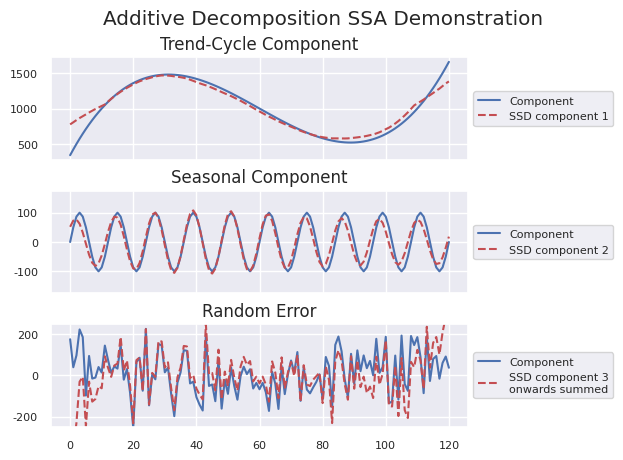

In [8]:
ssd_decomp = CovRegpy_ssd(x11_time_series, initial_trend_ratio=10.0, plot=False)

fig, axs = plt.subplots(3, 1)
plt.subplots_adjust(hspace=0.3)
fig.suptitle('Additive Decomposition SSA Demonstration')
axs[0].plot(x11_time, x11_trend_cycle, label='Component')
axs[0].plot(x11_time, ssd_decomp[0, :], 'r--', label='SSD component 1')
axs[0].set_xticks([0, 20, 40, 60, 80, 100, 120])
axs[0].set_xticklabels(['', '', '', '', '', '', ''], fontsize=8)
axs[0].set_yticks([500, 1000, 1500])
axs[0].set_yticklabels(['500', '1000', '1500'], fontsize=8)
axs[0].set_title('Trend-Cycle Component')
box_0 = axs[0].get_position()
axs[0].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.84, box_0.height])
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
axs[1].plot(x11_time, x11_seasonal, label='Component')
axs[1].plot(x11_time, ssd_decomp[1, :], 'r--', label='SSD component 2')
axs[1].set_xticks([0, 20, 40, 60, 80, 100, 120])
axs[1].set_xticklabels(['', '', '', '', '', '', ''], fontsize=8)
axs[1].set_yticks([-100, 0, 100])
axs[1].set_yticklabels(['-100', '0', '100'], fontsize=8)
axs[1].set_ylim(-175, 175)
axs[1].set_title('Seasonal Component')
box_1 = axs[1].get_position()
axs[1].set_position([box_1.x0 - 0.05, box_1.y0, box_1.width * 0.84, box_1.height])
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
axs[2].plot(x11_time, x11_noise, label='Component')
axs[2].plot(x11_time, np.sum(ssd_decomp[2:, :], axis=0), 'r--',
            label=textwrap.fill('SSD component 3 onwards summed', 15))
axs[2].set_xticks([0, 20, 40, 60, 80, 100, 120])
axs[2].set_xticklabels(['0', '20', '40', '60', '80', '100', '120'], fontsize=8)
axs[2].set_yticks([-200, 0, 200])
axs[2].set_yticklabels(['-200', '0', '200'], fontsize=8)
axs[2].set_ylim(-250, 250)
axs[2].set_title('Random Error')
box_2 = axs[2].get_position()
axs[2].set_position([box_2.x0 - 0.05, box_2.y0, box_2.width * 0.84, box_2.height])
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
# axs[2].set_xlabel('Months')
plt.show()

Figure 7. SSD of example time series using adjustable initial trend isolation window with the ubiquitous
problem that also permeates EMD analysis known as the edge effect or frequency leakage between trend-cycle
component and random error or irregular component.

### 4.6 Implicit Factor Context with Regularised Covariance Regression

As detailed in Figure 1, the three implicit factor extraction algorithms described in this section isolate components that may then be used as independent covariates ($\mathbf{X}$) in the RCR framework described in the following section. The implicit factor algorithms are not a necessary step, but it is advised that if covariance forecasting is intended that the components used in Algorithm 1 be smoothed or subjected to some form of preprocessing to ensure the forecasted covariance evolves smoothly over time as in Figures 8, 9, 10, and 11.

## 5. Actuarial Case Study 1: Reduction in Lung Capacity versus Age and Physiology as an Effective Early Lung Disease Indicator

In this case study we introduce the covariance regression model from Hoff and Niu (2012). This
model is generalised in this work through the use of the implicit factors as exogenous variables
in the covariance regression framework and the regularisation of the covariance regression intro-
duced in Sections 5.4, 5.5, 5.6, 5.7, and 5.8. We also formalise the independent mean definition
in Section 5.3 wherein users can define the mean of the dependent variable before fitting the
covariance regression. We make clear the actuarial applications of this research in Section 5.1.
Section 5.2 notes the known diagnostic-assisting strength of FEV measures as it pertains to cor-
rectly identifying lung obstructions and degeneration as a proxy for underlying conditions. The
early diagnosis of common respiratory disorders such as:

- small cell lung cancer;
- non-small cell lung cancers such as:
    - Adenocarcinoma;
    - Squamous cell cancer;
    - Large cell carcinoma;
- emphysema;
- chronic bronchitis; and
- chronic asthma;

would significantly reduce the cost to insurers. Early diagnosis (through cheap tests and indicators
such as FEV) would lead to low-cost early treatment or prevention as compared to late-stage
diagnosis and expensive treatment and end-of-life therapy. These cost-benefits are discussed in
Section 5.1 with the specifics of FEV as an indicator of underlying condition being outlined in
Section 5.2. The rest of the section is dedicated to the exposition of RCR with some closing
remarks and a brief summary in Section 5.9.

### 5.1 Early Lung Disease Detection and Insurance Benefits

In Pyenson et al. (2012), the short-term costs and long-term benefits of screening for lung cancer
in high-risk populations (aged 50-64 in the USA) is demonstrated. The further reduced cost of the
FEV screening (as an indicator for cancer or further, more-expensive, testing) of at-risk popula-
tions in the UK and elsewhere would greatly reduce the strain on national health institutions. The
FEV measures examined herein, the research of Cho and Stout-Delgado (2020) which notes a dis-
tinctive linear decrease in lung capacity with age, and our research which puts confidence bounds
on the lung capacity as a function of age and size would all assist in cheap, early, and accurate
measurement of reduced lung capacity that would reduce the future cost of cancer treatment. The
research of Pyenson et al. (2012) strongly indicates that cheap and early screening for lung cancer
would greatly decrease the future strain of healthcare costs on insurers.
Fitch et al. (2011) assesses the prevalence of COPD (in patients without co-exisiting asthma) in
a large group of patients (44,366) with a focus on determining a link between the severity of the
condition and the level of adherence to prescribed medication. This work assists in determining the
distributional severity of COPD (grouped into mild, moderate, severe, and very severe) amongst
those making claims which allows insurers to make reasonable adjustments to their health plans
based on this distribution. In Section 5.2 we make clear the diagnostic value of the FEV mea-
surement for further tests or underlying lung degeneration which would also assist in grouping
insurance clients into probabilistic groups based on likely severity of condition and mortality
rates applications to policy pricing.
It is noted in Pyenson et al. (2014) that lung cancer is, by a wide margin, the greatest cause of
cancer deaths worldwide. low-dose computed tomography (LDCT) is used to confirm the pres-
ence of lung cancer, but these tests are expensive and only conducted on populations deemed to
be at risk based solely on smoking history and age - these two factors are, admittedly, strongly
correlated with lung cancer instances. FEV and other inexpensive lung function tests are effective
earlier indicators of reduced lung function for insurers to plan and allocate funds for future LDCT
tests and potential treatments. Measures of lung capacity relative to age and size of an individual
(which can be further stratified by gender) amongst a broader grouping of at-risk individuals such
as younger populations in polluted cities or with vocations where exposure to hazardous airborne
particulates can assist in early detection and further save insurers future health expenditures. The
FEV (modelled herein) and other lung capacity tests (such as FEV per second compared to total
FEV) are shown in Section 5.2 to be diagnostically valuable indicators of diseased lungs.
Dash and Grimshaw (1993) assess the costs associated with positive cancer diagnoses from
a different perspective: Dread Disease contracts. Dread Disease contracts are insurance policies
that have become increasingly popular in the UK (Dash and Grimshaw (1993)) and payout pre-
determined lump sums upon the realisation of certain mortal contingencies. As stated above, lung
cancer is the largest cause of cancer deaths and any indicators of potential future lung deficiencies
(such as FEV discussed herein) that could lead to cancer could significantly decrease the future
cost to the underwriters of these Dread Disease contracts. Changes in marketing policies in the
UK have lead to an increased interest in these contracts.
Efird et al. (2014) investigates the stage of lung cancer diagnosis as it relates to racial groups
and health insurance policies. It is noted that survival rates among lung cancer diagnosees are
intimately linked with the stage at which it is first detected. It is noted that the type of insurance policy did not relate to the stage of the cancer diagnosis. Cheap and diagnostically valuable infor-
mation such as early indicators of decreased lung capacity (FEV discussed herein) could assist
in ameliorating this notably significant disparity between racial groups which would assist with
the costs to insurers as a results of late diagnosis and expensive late-stage treatment compared to
comparatively cheaper earlier stage treatments.
Yang et al. (2019) notes the increasing life expectancies of those living with HIV and AIDS
as a result of the provision of antiretrovirals. This decreased HIV-related mortality has had the
unintended consequence of increased exposure to chronic illnesses, particularly lung diseases,
which are often exacerbated by HIV, AIDS, or the associated antiretrovirals. It is noted in Yang
et al. (2019) that the prescence of HIV or AIDs in an individual’s system results symptoms that
mimic an increased rate of biological aging which, when taking into account with this research
and the known linear degradation in lung capacity with age (Cho and Stout-Delgado (2020)), can
be used in the early detection of lung functional decay for the provision, by large private insurers
(Yang et al. (2019)), of funding for the relevant treatment.

### 5.2 Forced Expiratory Volume and Mortality

As early as 1846 in Hutchinson (1846) (which cites far older work) the measure of the lung
capacity as a proxy for the normal function of the lungs was established as a viable diagnostic tool
for determining the presence of lung disease. Specifically, this work focused on the spirometer
which measures the rate of air expulsion from the lung as well as the total lung expulsion and uses
these measurements (FEV per second and total FEV) against normally distributed values based on
an individuals height (as a proxy of size and, therefore, expected lung capacity), gender, and age
when making probabilistic predictions (which would be greatly assisted by our research) about an
individuals health. These measurements and an individuals expected health incomes would greatly
assist in calculating competitive insurance premiums.
Casanova et al. (2005) provides evidence that supports the correlative link between decreased
FEV and the increased likelihood of death related to COPD which is caused by a number of serious
medical conditions such as Emphysema and Chronic Bronchitis. It is noted in this study, Casanova
et al. (2005), that age is also a contributory factor in the decrease of lung capacity measured by
the proxy of lung capacity, FEV. The study of the covariance between FEV and age in this work
should be used in conjunction with work such as Dyer (2012) which studies the decreases in
lung capacity with age in the absence of confounding medical causes to better predict mortality
outcomes.
Further, Dykstra et al. (1999) uses the FEV (among numerous other lung capacity measures) as
a contributory diagnostic tool when determining whether a patient with a ratio of FEV per second
to total FEV of less than 70% has asthma or COPD. By noting the stabilising trend of FEV versus
age in Figure 8 and the work in Cho and Stout-Delgado (2020) that supports a known approxi-
mately linear level of lung deterioration with of age beyond 35 (approximately 20 mL/year), one
can use deviations from the this trend as a contributory diagnostic factor. Cho and Stout-Delgado
(2020) and our work can also assist in the construction of modified mortality tables for individuals
whose lung capacity depreciation rate is above those forecasted and observed.
In the study conducted in French et al. (2015) both age and lowered FEV (and the further
measure of the ratio of inspiratory capacity to total lung capacity once a lowered ratio of FEV
per second to total lung capacity established the presence of COPD) were shown as significant
indicators of increased of mortality. Specific occupations have increased risk of lung diseases -
Farmer’s Lung (caused by the increased inhalation of biologic dust particles) is one such disease.
Braun et al. (1979) studies the long-term and clinical outcomes of this disease - this research (and
other such research) coupled with our research could assist in competitive pricing of life insurance
premiums and provide a framework for individual insurance pricing.

Covariance regression was originally proposed in  Hoff and Niu (2012). Algorithm 1 defines a modified version of the original algorithm where the local mean of the dependent variables can be estimated independently of the algorithm. This allows for increased flexibility in defining a local mean structure. A rank 1 covariance regression model seeks to calculate $ \boldsymbol{\Psi} $, the base unattributable (or systemic or contemporaneous) covariance, and $ \mathbf{B} $, the matrix of coefficients relating the covariance of $ \mathbf{Y} $ to the independent variables $ \mathbf{X} $ such that:

\begin{equation} \label{eq:cov_eq}
    \text{cov}[\mathbf{Y}|\mathbf{X}] = \boldsymbol{\Psi} + \mathbf{B}\mathbf{X}\mathbf{X}^T\mathbf{B}^T.
\end{equation}

In the following section, the independent mean covariance regression model is introduced in
translatable pseudo-code in Algorithm 1. In this algorithm Equation (31) is repeated from Hoff and
Niu (2012) which assumes the iterative inverses are well-behaved. Within this software package,
the pseudo-inverse is used to avoid unnecessary errors. The sections that follow this restatement
of the algorithm (with a defined pseudo-code algorithm and independent mean definition) are
discussed with particular focus on variations of the Equation (31) for differing degrees of fitting
and variable selection - these algorithmic variations are presented herein for the first time and
applied to the same data as in Hoff and Niu (2012) for direct comparison with the original tech-
nique both formally and graphically as in Figures 10 and 11. These algorithmic variations are
presented here for the reader to explore and develop - the implicit factor models developed in
the previous section are ideal candidates for independent variables in the regularised covariance
regression framework owing to (most of) them yielding smoothed factors (compared to discontin-
uous explicit market factors such as the 10-year bond yield, etc.) for relatively smooth forecasted
covariance transitions.

### 5.3 Independent Mean Covariance Regression

In Hoff and Niu (2012), covariance regression is introduced along with the formal derivations. In
this section a modified and more robust version of the algorithm originally presented in Hoff and
Niu (2012) is presented and detailed in Algorithm 1.

In the absence of some stopping criterion, the modified covariance regression algorithm requires five inputs. Matrices $ \mathbf{A} \in \mathbb{R}^{(q\times{p})} $ and $ \mathbf{X}_1 \in \mathbb{R}^{({n}\times{q})} $ are the major modification to the original algorithm in that the means of the dependent variable, $ \mathbf{Y} $, can be calculated and optimised independent of the variance calculation. This increased robustness is ideal for variance attributable to different frequency structures which are common in the financial setting. The mean matrix, $ \boldsymbol{\mu} \in \mathbb{R}^{(n\times{p})} $ is calculated as $ \boldsymbol{\mu} = \mathbf{X}_1{\mathbf{A}} $ with $q$ being the number of independent variables (implicit or explicit factors) used in the model, $p$ being the number of dependent variables, and $n$ being the number of observations.

With $ \mathbf{X}_2 \in \mathbb{R}^{(n\times{r})} $ being the matrix of independent variables which can be different to the basis matrix for mean construction, i.e. different to $ \mathbf{X}_1 $, with $ \mathbf{Y} \in \mathbb{R}^{(n\times{p})} $ being the matrix of independent variables, $ \mathbf{B} \in \mathbb{R}^{({p}\times{n})} $ being the matrix of structural covariance coefficients, and with $ \mathbf{max\_iter} $ being the maximum allowed algorithmic iterations.

<img src="RCR_algorithm.png" style="zoom:100%;" />

Using Algorithm 1, the data from Hoff and Niu (2012), and the specification of the cubic B-
spline knot points as in Hoff and Niu (2012) (knots at 4, 11, 18) one arrives at Equation (32) below
with $ \mathbf{X}_2 = [\mathbf{1}, \textbf{age}^{\frac{1}{2}}, \textbf{age}]^T $. Using these parameters one can arrive at Figures 8 and 9 to estimate the covariation of FEV and height as a function of age from Hoff and Niu (2012).

\begin{equation} \label{eq:B_direct}
\mathbf{B}_{direct} = \left[\begin{array}{rr}
-2.60408& -10.45065\\
1.43707& 6.44579\\
-0.14644& -0.82822
\end{array}\right].
\end{equation}

In [9]:
def b(knots, time, degree):
    """
    Recursive method for building basis functions - concise and effective.

    Parameters
    ----------
    knots : real ndarray
        Entire knot vector or subset of knot vector depending on level of recursion.
        Number of knots provided depends on degree of basis function i.e. degree = 3 -> len(knots) = 5

    time : real ndarray
        Time over which basis functions will be defined.

    degree : positive integer
        Degree of basis spline to be constructed.

    Returns
    -------
    output : real ndarray
        Single basis spline of degree: "degree".

    Notes
    -----
    Continually subsets knot vector by one increment until base case is reached.

    """
    if degree == 0:

        output = ((knots[0] <= time) & (time < knots[1])) * 1.0

        return output

    else:

        c1 = (time - knots[0] * np.ones_like(time)) / \
             (knots[-2] * np.ones_like(time) - knots[0] * np.ones_like(time)) * b(knots[0:-1], time, degree - 1)

        c2 = (knots[-1] * np.ones_like(time) - time) / \
             (knots[-1] * np.ones_like(time) - knots[1] * np.ones_like(time)) * b(knots[1:], time, degree - 1)

        output = c1 + c2

    return output

In [10]:
def cubic_b_spline(knots, time):
    """
    Returns a (len(knots) - 4) x len(time) array. Each row is an individual cubic basis.
    Matrix is sparse. Each column contains at most 4 non-zero values (only four bases overlap at any point).

    Parameters
    ----------
    knots : real ndarray
        Knot points to be used (not necessarily evenly spaced).

    time : real ndarray
        Time over which basis matrix will be defined.

    Returns
    -------
    matrix_c : real ndarray
        Each row of matrix contains an individual cubic basis spline.

    Notes
    -----
    A vector 'c' can be calculated such that with output of this function being array 'B' and a time series being 's'
    the objective function ||(B^T)c - s||^2 is minimized to yield coefficient vector 'c'.

    """
    num_c = len(knots) - 4  # cubic basis-spline -> 4 fewer coefficients than knots

    matrix_c = np.zeros((num_c, len(time)))  # each row is a single basis function

    for tau in range(num_c):  # watch inequalities

        temp_knots = knots[tau:(tau + 5)]  # select 5 knots applicable to current cubic spline

        matrix_c[tau, :] = b(temp_knots, time, 3)  # calls func b above

    return matrix_c

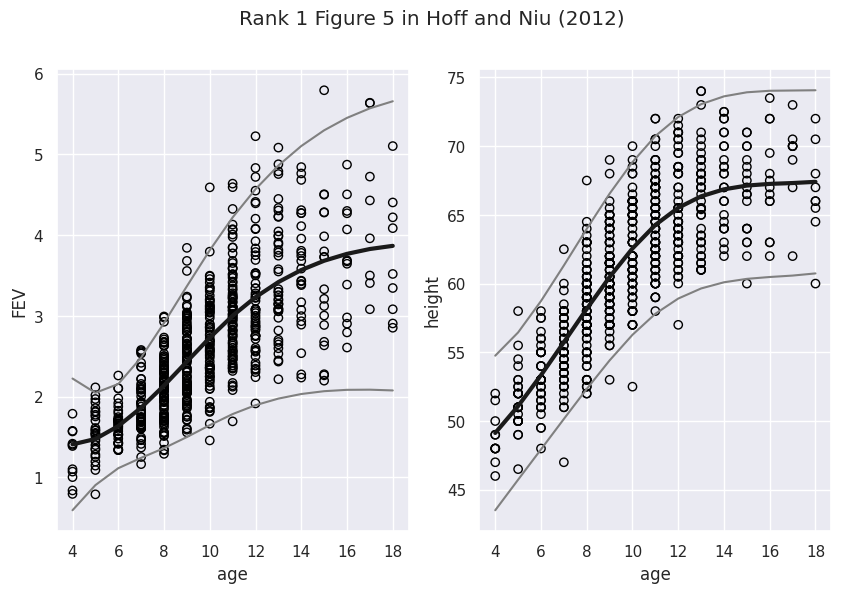

In [13]:
# load raw data
raw_data = pd.read_csv('../Peter_Hoff_Data/peter_hoff_data', header=0)
raw_data = np.asarray(raw_data)

# prepare data
peter_hoff_data = np.zeros((654, 3))

for row in range(654):

    if row < 309:
        peter_hoff_data[row, 0] = int(raw_data[row, 0][2])
    else:
        peter_hoff_data[row, 0] = int(raw_data[row, 0][1:3])

    if peter_hoff_data[row, 0] == 3:  # original paper groups those aged 3 into age 4
        peter_hoff_data[row, 0] = 4
    elif peter_hoff_data[row, 0] == 19:  # original paper groups those aged 19 into age 18
        peter_hoff_data[row, 0] = 18
    peter_hoff_data[row, 1] = float(raw_data[row, 0][4:10])  # fev values always 6 text values
    peter_hoff_data[row, 2] = float(raw_data[row, 0][11:15])  # height values always 4 text values

peter_hoff_data = pd.DataFrame(peter_hoff_data, columns=['age', 'fev', 'height'])

# knots and time used in original paper
spline_basis = cubic_b_spline(knots=np.linspace(-17, 39, 9), time=np.linspace(4, 18, 15))
spline_basis = np.vstack((spline_basis, np.linspace(4, 18, 15)))

age_vector = np.asarray(peter_hoff_data['age'])
spline_basis_transform = np.zeros((6, 654))
for col in range(len(age_vector)):
    spline_basis_transform[:, col] = spline_basis[:, int(age_vector[col] - 4)]

coef_fev = np.linalg.lstsq(spline_basis_transform.transpose(), np.asarray(peter_hoff_data['fev']), rcond=None)
coef_fev = coef_fev[0]
mean_fev = np.matmul(coef_fev, spline_basis)

coef_height = np.linalg.lstsq(spline_basis_transform.transpose(), np.asarray(peter_hoff_data['height']), rcond=None)
coef_height = coef_height[0]
mean_height = np.matmul(coef_height, spline_basis)

x_cov = np.vstack((np.ones((1, 654)), (age_vector ** (1 / 2)).reshape(1, 654), age_vector.reshape(1, 654)))
y = np.vstack((np.asarray(peter_hoff_data['fev']).reshape(1, 654),
               np.asarray(peter_hoff_data['height']).reshape(1, 654)))
# mean = np.vstack((np.matmul(coef_fev, spline_basis_transform), np.matmul(coef_height, spline_basis_transform)))
A_est = np.hstack((coef_fev.reshape(6, 1), coef_height.reshape(6, 1)))
B_est, Psi_est = cov_reg_given_mean(A_est=A_est, basis=spline_basis_transform, x=x_cov, y=y, iterations=100)

mod_x_cov = np.vstack((np.ones((1, 15)),
                       (np.linspace(4, 18, 15) ** (1 / 2)).reshape(1, 15),
                       np.linspace(4, 18, 15).reshape(1, 15)))

# mean and covariance plots

cov_3d = np.zeros((2, 2, 15))
for depth in range(np.shape(cov_3d)[2]):
    cov_3d[:, :, depth] = Psi_est + np.matmul(np.matmul(B_est.T, mod_x_cov[:, depth]).reshape(2, -1),
                                              np.matmul(mod_x_cov[:, depth].T, B_est).reshape(-1, 2))

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Rank 1 Figure 5 in Hoff and Niu (2012)')
axs[0].scatter(peter_hoff_data['age'], peter_hoff_data['fev'], facecolor='none', edgecolor='black')
axs[0].plot(np.linspace(4, 18, 15), mean_fev, linewidth=3, c='k')
axs[0].plot(np.linspace(4, 18, 15), mean_fev + 2 * np.sqrt(cov_3d[0, 0, :]), c='grey')
axs[0].plot(np.linspace(4, 18, 15), mean_fev - 2 * np.sqrt(cov_3d[0, 0, :]), c='grey')
axs[0].set_xlabel('age')
axs[0].set_ylabel('FEV')
axs[0].set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
axs[0].set_yticks([1, 2, 3, 4, 5, 6])
axs[1].scatter(peter_hoff_data['age'], peter_hoff_data['height'], facecolor='none', edgecolor='black')
axs[1].plot(np.linspace(4, 18, 15), mean_height, linewidth=3, c='k')
axs[1].plot(np.linspace(4, 18, 15), mean_height + 2 * np.sqrt(cov_3d[1, 1, :]), c='grey')
axs[1].plot(np.linspace(4, 18, 15), mean_height - 2 * np.sqrt(cov_3d[1, 1, :]), c='grey')
axs[1].set_xlabel('age')
axs[1].set_ylabel('height')
axs[1].set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
axs[1].set_yticks([45, 50, 55, 60, 65, 70, 75])
plt.show()

Figure 8. Replication of Figure 5 from (Hoff and Niu, 2012, see p. 24) plotting FEV data and variance in the
left figure and height data and variance in the right figure as a function of age.

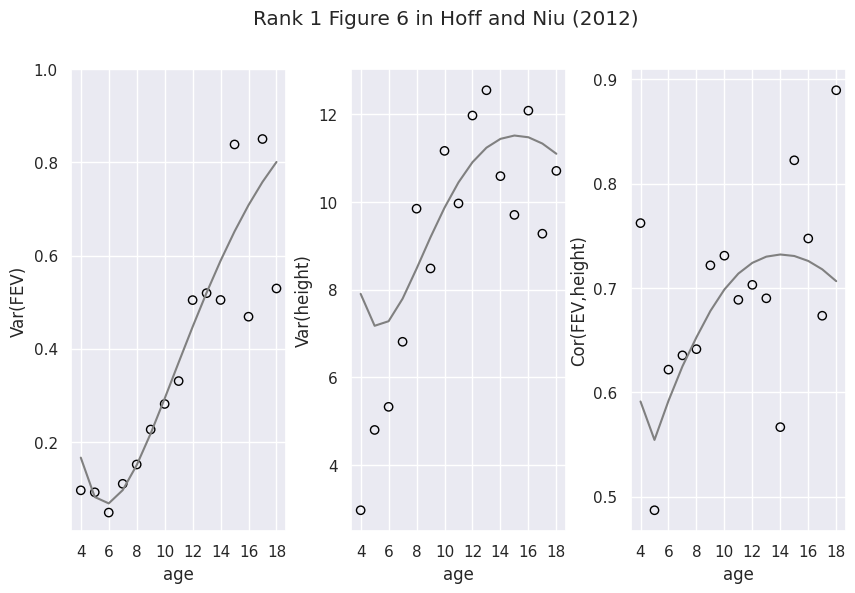

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
fig.suptitle('Rank 1 Figure 6 in Hoff and Niu (2012)')
axs[0].plot(np.linspace(4, 18, 15), cov_3d[0, 0, :], c='grey')
fev_var = np.zeros_like(np.linspace(4, 18, 15))
for i, age in enumerate(range(4, 19)):
    fev_var[i] = np.var(np.asarray(peter_hoff_data['fev'])[np.asarray(peter_hoff_data['age']) == age])
axs[0].scatter(np.linspace(4, 18, 15), fev_var, facecolor='none', edgecolor='black')
axs[0].set_xlabel('age')
axs[0].set_ylabel('Var(FEV)')
axs[0].set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
axs[0].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
axs[1].plot(np.linspace(4, 18, 15), cov_3d[1, 1, :], c='grey')
height_var = np.zeros_like(np.linspace(4, 18, 15))
for i, age in enumerate(range(4, 19)):
    height_var[i] = np.var(np.asarray(peter_hoff_data['height'])[np.asarray(peter_hoff_data['age']) == age])
axs[1].scatter(np.linspace(4, 18, 15), height_var, facecolor='none', edgecolor='black')
axs[1].set_xlabel('age')
axs[1].set_ylabel('Var(height)')
axs[1].set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
axs[1].set_yticks([4, 6, 8, 10, 12])
axs[2].plot(np.linspace(4, 18, 15), cov_3d[0, 1, :] / (np.sqrt(cov_3d[0, 0, :]) * np.sqrt(cov_3d[1, 1, :])), c='grey')
fev_height_cov = np.zeros_like(np.linspace(4, 18, 15))
for i, age in enumerate(range(4, 19)):
    fev_height_cov[i] = np.corrcoef(np.asarray(peter_hoff_data['fev'])[np.asarray(peter_hoff_data['age']) == age],
                                    np.asarray(peter_hoff_data['height'])[
                                        np.asarray(peter_hoff_data['age']) == age])[0, 1]
axs[2].scatter(np.linspace(4, 18, 15), fev_height_cov, facecolor='none', edgecolor='black')
axs[2].set_xlabel('age')
axs[2].set_ylabel('Cor(FEV,height)')
axs[2].set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
axs[2].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
plt.show()

Figure 9. Replication of Figure 6 from (Hoff and Niu, 2012, see p. 25) plotting FEV data and variance, height
data and variance, and FEV and height data and correlation as a function of age.

### 5.4 Least Absolute Shrinkage and Selection Operator (LASSO) Covariance Regression

Equation (31) is the direct calculation of $ \mathbf{B} $, but in RCR $ \mathbf{B} $ can be calculated in several ways. $ \mathbf{B}_{LASSO} $ is calculated by minimising the following:

\begin{equation} \label{eq:lasso_regression}
\text{arg }\text{min}_{\mathbf{B}}\bigg((\tilde{\mathbf{Y}} - \tilde{\mathbf{X}}_2\mathbf{B}^T)^T(\tilde{\mathbf{Y}} - \tilde{\mathbf{X}}_2\mathbf{B}^T) + \lambda_1{||\mathbf{B}||_1}\bigg).
\end{equation}

This form of optimisation promotes sparsity as can be seen in Equation (34). In Equation (34), it can
be noted that the variances and covariance of FEV and height concerning age are most dependent
upon **age**. As a result of the structure of Equation (30), the covariance matrix becomes a function
of age squared.

\begin{equation} \label{eq:B_lasso}
\mathbf{B}_{\text{lasso}} = \left[\begin{array}{rr}
-0.00000& -0.00000\\
-0.00000& -0.00000\\
-0.04537& -0.12452
\end{array}\right].
\end{equation}

### 5.5 Ridge Regression Covariance Regression

Ridge regression penalises unjustifiably large coefficients in $ \mathbf{B} $ by optimising the following:

\begin{equation} \label{eq:ridge}
\text{arg }\text{min}_{\mathbf{B}}\bigg((\tilde{\mathbf{Y}} - \tilde{\mathbf{X}}_2\mathbf{B}^T)^T(\tilde{\mathbf{Y}} - \tilde{\mathbf{X}}_2\mathbf{B}^T) + \lambda_2{||\mathbf{B}||^2_2}\bigg).
\end{equation}

In this setting, by manipulating Equation (35) one can observe that ridge regression introduces a
bias such that:

\begin{equation} \label{eq:ridge_regression}
\text{arg }\text{min}_{\mathbf{B}}\bigg(||\tilde{\mathbf{Y}} - \tilde{\mathbf{X}}_2\mathbf{B}^T + \lambda_2\mathbf{B}||^2_2\bigg).
\end{equation}

By referring to Equation (31) and noting the structure of Equation (36), Equation (37) follows as a biased version of the original direct solution where $ \lambda_2 $ can also be seen as a bias term rather than merely a penalty:

\begin{equation} \label{eq:calc_B_ridge} 
\mathbf{B} = \tilde{\mathbf{Y}}^T\tilde{\mathbf{X}}_2\Big(\tilde{\mathbf{X}}_2^T\tilde{\mathbf{X}}_2 + \lambda_2\mathbf{I}\Big)^{-1}. 
\end{equation}

By comparing Equation (32) against Equation (38) it can be noted that the coefficients have been
greatly reduced as a result of the penalising or biasing term.

\begin{equation} \label{eq:B_ridge}
\mathbf{B}_{\text{ridge}} = \left[\begin{array}{rr}
0.27839& 1.31838\\
0.07562& -0.51146\\
-0.09374& -0.10844
\end{array}\right].
\end{equation}

### 5.6 Elastic Net Covariance Regression

Elastic net regression is a compromise between LASSO regression and Ridge regression where $ \mathbf{B} $ is optimised using the following:

\begin{equation} \label{eq:elastic_net}
\text{arg }\text{min}_{\mathbf{B}}\bigg((\tilde{\mathbf{Y}} - \tilde{\mathbf{X}}_2\mathbf{B}^T)^T(\tilde{\mathbf{Y}} - \tilde{\mathbf{X}}_2\mathbf{B}^T) + \lambda_1{||\mathbf{B}||_1} + \lambda_2{||\mathbf{B}||^2_2}\bigg).
\end{equation}

This can be reparameterized (as is in Python) to:

\begin{equation} \label{eq:l1_ratio}
\text{arg }\text{min}_{\mathbf{B}}\bigg((\tilde{\mathbf{Y}} - \tilde{\mathbf{X}}_2\mathbf{B}^T)^T(\tilde{\mathbf{Y}} - \tilde{\mathbf{X}}_2\mathbf{B}^T) + \lambda_1r_1{||\mathbf{B}||_1} + \frac{1}{2}\lambda_1(1-r_1){||\mathbf{B}||^2_2}\bigg),
\end{equation}

with $ r_1 $ being the ratio of the L1-norm to the L2-norm. Noting that Equation (39) can be viewed as a combination of Equation (33) and Equation (36), it becomes clear why Equation (41) displays both sparsity and smaller parameters. This is seen as a favourable compromise between the two methods.

\begin{equation} \label{eq:B_elastic_net}
\mathbf{B}_{\text{elastic-net}} = \left[\begin{array}{rr}
0.00000& 0.00000\\
0.02062& -0.04304\\
-0.05310& -0.12245
\end{array}\right].
\end{equation}

### 5.7 Group Least Absolute Shrinkage and Selection Operator Covariance Regression

The Group Least Absolute Shrinkage and Selection Operator (LASSO) regression promotes a
sparse number of groups of parameters and in each group, there will be a sparse set of parameters.

\begin{equation} \label{eq:group_lasso}
\text{arg }\text{min}_{\mathbf{B}}\bigg((\tilde{\mathbf{Y}} - \tilde{\mathbf{X}}_2\mathbf{B}^T)^T(\tilde{\mathbf{Y}} - \tilde{\mathbf{X}}_2\mathbf{B}^T) + \lambda_1{||\mathbf{B}||_1} + \lambda_g{\sum_{g\in\mathcal{G}}\sqrt{d_g}||B_g||_2}\bigg).
\end{equation}

In Equation (43), $ \lambda_g $ is the penalty term for the grouped co-efficient terms, $ \mathcal{G} $ is a partition of the coefficients into subsets, $ d_g $ is the cardinality of each of the subsets (larger sets get penalised more than smaller sets), and $ B_g $ is the set coefficients within subgroup $ g $. With a grouping of \{0, 1, 1\}, that is with the constant being in a group separate from **age**$^{\frac{1}{2}}$ and **age**, this results in the following parameter estimates:

\begin{equation} \label{eq:B_group_lasso}
\mathbf{B}_{\text{group-lasso}} = \left[\begin{array}{rr}
0.00823& -0.00091\\
0.00577& -0.03660\\
-0.04977& -0.12262
\end{array}\right].
\end{equation}

### 5.8 Subgradient Covariance Regression

Equation (44) can be seen as being identical to Equation (33) in Section 5.4. The differences lie in
the method of approaching this solution. Subgradient descent or subgradient optimisation allows
optimisation when functions are continuous, but non-differentiable.

\begin{equation} \label{eq:subgradient}
\begin{split}
\text{minimize } &||\mathbf{B}||_1\\
\text{subject to } &\tilde{\mathbf{X}}_2\mathbf{B}^T = \tilde{\mathbf{Y}},
\end{split}
\end{equation}

To initialise the algorithm, several candidates can be used. In this algorithm, $ \mathbf{B}_0 $ is initialised with Equation (31) which is the direct solution in Euclidean Norm Space. The next iteration of the solution, $ \mathbf{B}_{k+1} $ is calculate using the following:

\begin{equation} \label{eq:subgradient_increment}
\mathbf{B}_{k+1} = \mathbf{B}_k - \alpha_k\bigg(\mathbf{I}_p - \tilde{\mathbf{X}}_2^T\big(\tilde{\mathbf{X}}_2\tilde{\mathbf{X}}_2^T\big)^{-1}\tilde{\mathbf{X}}_2\text{ sign}\big(\mathbf{B}_k\big)\bigg),
\end{equation}

with $ \text{sign}(\cdot) $ being defined as:

\begin{equation}
\text{sign}(x) = \left\{\begin{array}{rr}
+1, & \text{ for } x > 0\\
0, & \text{ for } x = 0\\
-1, & \text{ for } x < 0\\
\end{array}\right\},
\end{equation}

and with the incremental step size being a member of the square summable, but not summable family of step sizes. In this application $ \alpha_k = \frac{10^{-2}}{k} $ with the formal conditions of the square summable step sizes required to satisfy the following conditions:

\begin{equation}
\alpha_k > 0\text{ }\forall\text{ }k > 0, \sum_{i=0}^\infty\alpha_k^2 < \infty, \text{ and } \sum_{i=0}^\infty\alpha_k = \infty.
\end{equation}

With this technique applied to the data set from Hoff and Niu (2012) using 10 iterations one arrives
at:

\begin{equation} \label{eq:B_subgradient}
\mathbf{B}_{\text{subgradient}} = \left[\begin{array}{rr}
-1.77455& -4.37165\\
1.44572& 3.53236\\
-0.28942& -0.71025
\end{array}\right].
\end{equation}

To estimate the base unattributable (or systemic or contemporaneous) covariance, $ \boldsymbol{\Psi} $, and the coefficients, $ \mathbf{B} $, that relate the attributable (or structural) covariance to the independent variables one can apply the following code.

Each of these techniques was applied to the original data set from Hoff and Niu (2012) and
the results are plotted in Figure 10 and Figure 11. In the code above, A est and basis refer
to the mean coefficients and basis to be used for means of the dependent variable, y, with x
being the independent variable. The number of iterations of the core covariance regression algorithm is controlled by the iterations parameter. The technique is being used in estimating the
$ \mathbf{B} $ matrix in each iteration of the total iterations. The options available for technique are
‘direct’, ‘lasso’, ‘ridge’, ‘elastic-net’, ‘group-lasso’, and ‘sub-gradient’ which
correspond to Sections 5.3, 5.4, 5.5, 5.6, 5.7, and 5.8, respectively. The unambiguous penalty term
for LASSO, ridge, elastic-net, group-LASSO regression as well as the first value in the subgradient
optimisation is alpha.

The l1 ratio or reg controls the ratio of the l1-ratio to l2-ratio as in Equation (40) when
performing elastic-net regression. The group-LASSO regression group penalty term is controlled
by group reg. While possibly misleading when compared against iterations, the max iter
parameter controls the number of iterations to be used in the subgradient descent algorithm as
in Equation (45). The groups variable controls the grouping of the independent variables and the
corresponding parameters using a vector of indices such as in Section 5.7. Finally, the test lasso
is a Boolean variable that controls whether the alpha value for LASSO regression is optimised.

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[-0.00408951 -0.00518972  0.00200804]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[-0.04822379 -0.06375383  0.02630516]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[-0.0006698  -0.00165836  0.00067894]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[-0.02419074 -0.0363044   0.01608058]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[0.00000000e+00 0.00000000e+00 6.96333362e-05]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[-0.01282705 -0.01880272  0.00977532]
[ 0.  0. -0.]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[-0.00544316 -0.00757511  0.00560517]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.          0.00031467 -0.00017222]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[-0.00042528 -0.0005328   0.0029062 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00025027  0.00104383 -0.00051544]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[0.00124521 0.00403379 0.00119826]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00103641  0.00225081 -0.00110975]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0040965   0.00838017 -0.00069536]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00237239  0.00431619 -0.00211752]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0078726   0.01406747 -0.00334608]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00459675  0.00777189 -0.00380339]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01366473  0.02297073 -0.00760876]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00830048  0.01348599 -0.0066007 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02306804  0.03760195 -0.01469244]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01433647  0.02282489 -0.01118343]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03840598  0.06146429 -0.0263472 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02384138  0.03745979 -0.01841876]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.06258165  0.09891411 -0.04483649]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03743975  0.05821539 -0.02886894]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.09720704  0.1520528  -0.07163449]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.05330649  0.081902   -0.04138075]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.13742643  0.21233999 -0.10370336]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.06657197  0.10071475 -0.05260902]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.17036574  0.25883361 -0.13217414]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.07407181  0.11010549 -0.06023008]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.18776162  0.27961559 -0.15099353]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.07658295  0.1119588  -0.06457226]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.19227898  0.28056735 -0.16136055]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.07606919  0.10956437 -0.06677   ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.18955456  0.27128932 -0.16655281]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.07397276  0.105177   -0.06770326]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.18346435  0.25793302 -0.1689128 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.07110978  0.10002072 -0.06790738]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.17600852  0.24339548 -0.16969955]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.06796366  0.09466018 -0.06768181]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.16807549  0.22890196 -0.16956082]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.06475068  0.08939771 -0.06720749]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.16008497  0.21488357 -0.16883285]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.06159592  0.08436824 -0.06659187]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.15220268  0.20153742 -0.16772646]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0585495   0.07963469 -0.0659015 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.14457893  0.18887961 -0.16636864]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.05566675  0.07522248 -0.06518241]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.13725354  0.17694047 -0.16485779]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.05296351  0.07110675 -0.06445463]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.13025834  0.16573364 -0.1632693 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.05041508  0.06729132 -0.06373729]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.12362486  0.15520033 -0.16164216]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.04805051  0.06374819 -0.06304064]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.11732899  0.1453293  -0.16001416]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.04584839  0.06046598 -0.06237206]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.11139764  0.13609857 -0.1584164 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.04378046  0.05742969 -0.06173468]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.10581896  0.1274382  -0.15685529]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.04187157  0.054607   -0.06112931]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.10056689  0.11932388 -0.15534454]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.04007621  0.05199307 -0.0605571 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.09559963  0.11175107 -0.15389843]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03842654  0.04953406 -0.06001035]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.09095246  0.10462294 -0.15250704]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0368798   0.04726111 -0.05949898]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.08657539  0.09792613 -0.15117504]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03541762  0.04515132 -0.05901834]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.08245662  0.09163765 -0.14990624]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03406977  0.04317553 -0.05856559]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.07854724  0.08575624 -0.14870523]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03278844  0.0413358  -0.05813968]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.07489101  0.0801918  -0.14755732]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03160686  0.03960616 -0.05773812]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.07143318  0.07497198 -0.14647265]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03047731  0.03799156 -0.05736001]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.06817556  0.07002335 -0.14543552]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02944185  0.03644192 -0.05699586]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.06506694  0.06534889 -0.14444731]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02843578  0.03500915 -0.05665668]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.06213577  0.06093997 -0.14351225]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0275104   0.03365507 -0.056337  ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.05936638  0.05673976 -0.14261604]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02661644  0.03238739 -0.05603579]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.05673675  0.05279058 -0.14177313]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02579946  0.03115539 -0.05574296]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.05421809  0.04901894 -0.14096173]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02499381  0.03001691 -0.05547059]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0518365   0.04544658 -0.1401932 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02423065  0.02894089 -0.05521301]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.04957836  0.04202203 -0.13945348]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0235312   0.02791592 -0.05496943]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.04742327  0.03879147 -0.13875678]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02285051  0.02692364 -0.05473088]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.04534545  0.03572698 -0.13809441]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02221611  0.02599236 -0.0545087 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0433825   0.0327468  -0.13744646]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02159199  0.02511966 -0.05429948]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.04150984  0.02994012 -0.13683955]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02102789  0.0242528  -0.05409239]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03972263  0.02726022 -0.13626044]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02045562  0.02345551 -0.05390056]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03800684  0.02468543 -0.13570231]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01991028  0.02269779 -0.05371862]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03633505  0.022229   -0.13516806]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01942136  0.02193915 -0.05353748]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03476439  0.01986907 -0.13465748]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01891936  0.02124435 -0.05337037]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03325317  0.01759506 -0.1341642 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01846769  0.02057686 -0.05321243]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03180647  0.01541527 -0.1336923 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01801653  0.0199183  -0.05305398]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.03042458  0.01332919 -0.13324271]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01757174  0.01930688 -0.05290699]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02908391  0.01130078 -0.13280257]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01717541  0.01871902 -0.05276851]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02779791  0.00937609 -0.13238796]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01677587  0.01813541 -0.05262835]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02653655  0.00751386 -0.1319846 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01638016  0.01759544 -0.05249891]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02533921  0.00570473 -0.1315931 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01603534  0.01704314 -0.05236801]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02419227  0.0039592  -0.13121667]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01566873  0.01654543 -0.05224908]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02308207  0.00225463 -0.13084791]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01531801  0.01607109 -0.05213641]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02201569  0.00060163 -0.13048919]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01501488  0.01557855 -0.05202067]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.02099044 -0.00100605 -0.13014011]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01468702  0.01513716 -0.05191604]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01999432 -0.00257657 -0.12979901]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01437696  0.01468352 -0.05180756]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01903591 -0.00409014 -0.12947183]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01409783  0.01426294 -0.05170992]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01809759 -0.00557415 -0.12914868]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01380606  0.01387411 -0.05161901]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01720339 -0.00699161 -0.12884373]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01352818  0.01346732 -0.0515225 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01634027 -0.00836261 -0.12855001]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01327957  0.01309006 -0.05143587]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01549014 -0.0097146  -0.1282574 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01301971  0.01270941 -0.05134586]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01467961 -0.01100667 -0.12798141]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01275772  0.01236325 -0.05126452]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01391827 -0.0122862  -0.12770837]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01254205  0.01199525 -0.05117958]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0131509  -0.01351327 -0.12744577]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01229733  0.011674   -0.05110469]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01240147 -0.01471356 -0.12718818]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01206621  0.01133513 -0.05102464]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01167998 -0.01587111 -0.12694169]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01186474  0.01102419 -0.0509544 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01096718 -0.01701573 -0.12669542]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01164605  0.0107406  -0.05088975]
[ 0.01032783 -0.01810876 -0.12646757]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01143711  0.01043409 -0.05081817]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00967306 -0.01916485 -0.12624574]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01125665  0.01015243 -0.05075551]
[ 0.00902018 -0.02021778 -0.12602108]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01106017  0.00986399 -0.05068851]
[ 0.00843626 -0.02122351 -0.12581358]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01085915  0.00960514 -0.05062893]
[ 0.00781827 -0.02222219 -0.1256014 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01067029  0.00932773 -0.05056406]
[ 0.00725816 -0.02318764 -0.12540123]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01051113  0.00907558 -0.05050849]
[ 0.00666681 -0.02414364 -0.12519758]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01033513  0.00881696 -0.05044874]
[ 0.00614065 -0.02505257 -0.1250112 ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.01015437  0.00858677 -0.0503962 ]
[ 0.00558082 -0.02595812 -0.12481963]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0100181   0.00833152 -0.05033949]
[ 0.00507318 -0.02683237 -0.12463944]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00984879  0.00811756 -0.05029136]
[ 0.00457339 -0.02769027 -0.12446209]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00968888  0.00788238 -0.0502371 ]
[ 0.00406129 -0.02851714 -0.12429042]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00952506  0.00767587 -0.0501903 ]
[ 0.00357428 -0.02934673 -0.12411747]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00940555  0.0074444  -0.05013944]
[ 0.00310508 -0.03014259 -0.12395385]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00925259  0.00725323 -0.05009694]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0026407  -0.03092448 -0.12379245]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00910825  0.00704074 -0.0500483 ]
[ 0.00218894 -0.0316791  -0.12363817]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00895966  0.00685531 -0.05000671]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00172963 -0.0324369  -0.12347988]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.0088551   0.00664506 -0.04996116]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00128422 -0.03316428 -0.12333003]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00871663  0.00647382 -0.04992362]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00084069 -0.03387953 -0.12318197]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00858595  0.00628128 -0.04987995]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00040619 -0.03457027 -0.12303999]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00845091  0.00611432 -0.04984295]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[-3.70727435e-05 -3.52662915e-02 -1.22893036e-01]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.00835958  0.00592284 -0.04980215]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[-0.00047346 -0.03593377 -0.12275409]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[ 0.008234    0.00576904 -0.049769  ]


/home/cole/miniconda3/envs/CovRegpy_311/lib/python3.11/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


[-0.00090252 -0.03659064 -0.12261725]


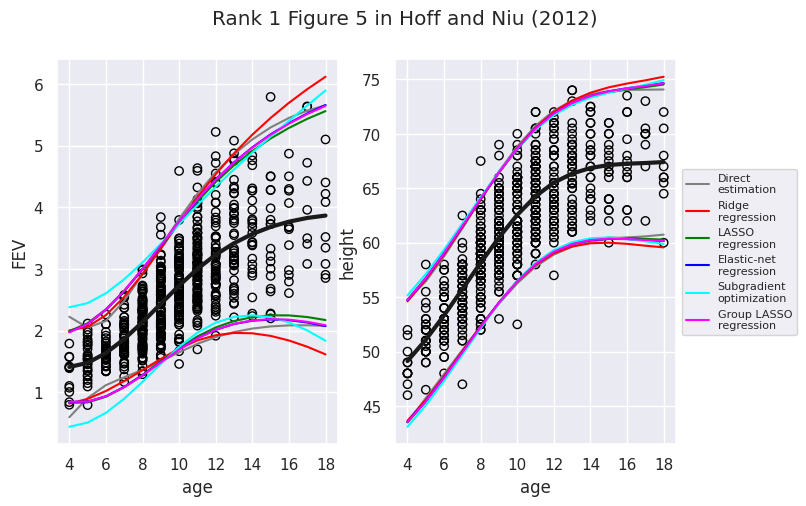

In [15]:
A_est = np.hstack((coef_fev.reshape(6, 1), coef_height.reshape(6, 1)))
B_est_ridge, Psi_est_ridge = cov_reg_given_mean(A_est=A_est, basis=spline_basis_transform, x=x_cov, y=y,
                                                iterations=100, technique='ridge')
B_est_lasso, Psi_est_lasso = cov_reg_given_mean(A_est=A_est, basis=spline_basis_transform, x=x_cov, y=y,
                                                iterations=100, technique='lasso', alpha=0.05)
B_est_net, Psi_est_net = cov_reg_given_mean(A_est=A_est, basis=spline_basis_transform, x=x_cov, y=y,
                                            iterations=100, technique='elastic-net', alpha=0.01,
                                            l1_ratio_or_reg=0.1)
B_est_sub, Psi_est_sub = cov_reg_given_mean(A_est=A_est, basis=spline_basis_transform, x=x_cov, y=y,
                                            iterations=10, technique='sub-gradient', alpha=0.01, max_iter=10)
B_est_group, Psi_est_group = cov_reg_given_mean(A_est=A_est, basis=spline_basis_transform, x=x_cov, y=y,
                                                iterations=100, technique='group-lasso', alpha=0.01, group_reg=1e-9,
                                                l1_ratio_or_reg=1e-6, groups=np.asarray([0, 1, 1]).reshape(-1, 1))

# mean and covariance plots

cov_3d_ridge = np.zeros((2, 2, 15))
cov_3d_lasso = np.zeros((2, 2, 15))
cov_3d_net = np.zeros((2, 2, 15))
cov_3d_sub = np.zeros((2, 2, 15))
cov_3d_group = np.zeros((2, 2, 15))
for depth in range(np.shape(cov_3d)[2]):
    cov_3d_ridge[:, :, depth] = \
        Psi_est_ridge + np.matmul(np.matmul(B_est_ridge.T, mod_x_cov[:, depth]).reshape(2, -1),
                                  np.matmul(mod_x_cov[:, depth].T, B_est_ridge).reshape(-1, 2))
    cov_3d_lasso[:, :, depth] = \
        Psi_est_lasso + np.matmul(np.matmul(B_est_lasso.T, mod_x_cov[:, depth]).reshape(2, -1),
                                  np.matmul(mod_x_cov[:, depth].T, B_est_lasso).reshape(-1, 2))
    cov_3d_net[:, :, depth] = \
        Psi_est_net + np.matmul(np.matmul(B_est_net.T, mod_x_cov[:, depth]).reshape(2, -1),
                                np.matmul(mod_x_cov[:, depth].T, B_est_net).reshape(-1, 2))
    cov_3d_sub[:, :, depth] = \
        Psi_est_sub + np.matmul(np.matmul(B_est_sub.T, mod_x_cov[:, depth]).reshape(2, -1),
                                np.matmul(mod_x_cov[:, depth].T, B_est_sub).reshape(-1, 2))
    cov_3d_group[:, :, depth] = \
        Psi_est_group + np.matmul(np.matmul(B_est_group.T, mod_x_cov[:, depth]).reshape(2, -1),
                                  np.matmul(mod_x_cov[:, depth].T, B_est_group).reshape(-1, 2))

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle('Rank 1 Figure 5 in Hoff and Niu (2012)')
axs[0].scatter(peter_hoff_data['age'], peter_hoff_data['fev'], facecolor='none', edgecolor='black')
axs[0].plot(np.linspace(4, 18, 15), mean_fev, linewidth=3, c='k')
axs[0].plot(np.linspace(4, 18, 15), mean_fev + 2 * np.sqrt(cov_3d[0, 0, :]), c='grey')
axs[0].plot(np.linspace(4, 18, 15), mean_fev - 2 * np.sqrt(cov_3d[0, 0, :]), c='grey')
axs[0].plot(np.linspace(4, 18, 15), mean_fev + 2 * np.sqrt(cov_3d_ridge[0, 0, :]), c='red')
axs[0].plot(np.linspace(4, 18, 15), mean_fev - 2 * np.sqrt(cov_3d_ridge[0, 0, :]), c='red')
axs[0].plot(np.linspace(4, 18, 15), mean_fev + 2 * np.sqrt(cov_3d_lasso[0, 0, :]), c='green')
axs[0].plot(np.linspace(4, 18, 15), mean_fev - 2 * np.sqrt(cov_3d_lasso[0, 0, :]), c='green')
axs[0].plot(np.linspace(4, 18, 15), mean_fev + 2 * np.sqrt(cov_3d_net[0, 0, :]), c='blue')
axs[0].plot(np.linspace(4, 18, 15), mean_fev - 2 * np.sqrt(cov_3d_net[0, 0, :]), c='blue')
axs[0].plot(np.linspace(4, 18, 15), mean_fev + 2 * np.sqrt(cov_3d_sub[0, 0, :]), c='cyan')
axs[0].plot(np.linspace(4, 18, 15), mean_fev - 2 * np.sqrt(cov_3d_sub[0, 0, :]), c='cyan')
axs[0].plot(np.linspace(4, 18, 15), mean_fev + 2 * np.sqrt(cov_3d_group[0, 0, :]), c='magenta')
axs[0].plot(np.linspace(4, 18, 15), mean_fev - 2 * np.sqrt(cov_3d_group[0, 0, :]), c='magenta')
axs[0].set_xlabel('age')
axs[0].set_ylabel('FEV')
axs[0].set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
axs[0].set_yticks([1, 2, 3, 4, 5, 6])
box_0 = axs[0].get_position()
axs[0].set_position([box_0.x0 - 0.06, box_0.y0, box_0.width, box_0.height])
axs[1].scatter(peter_hoff_data['age'], peter_hoff_data['height'], facecolor='none', edgecolor='black')
axs[1].plot(np.linspace(4, 18, 15), mean_height, linewidth=3, c='k')
axs[1].plot(np.linspace(4, 18, 15), mean_height + 2 * np.sqrt(cov_3d[1, 1, :]), c='grey',
            label=textwrap.fill('Direct estimation', 11))
axs[1].plot(np.linspace(4, 18, 15), mean_height - 2 * np.sqrt(cov_3d[1, 1, :]), c='grey')
axs[1].plot(np.linspace(4, 18, 15), mean_height + 2 * np.sqrt(cov_3d_ridge[1, 1, :]), c='red',
            label=textwrap.fill('Ridge regression', 11))
axs[1].plot(np.linspace(4, 18, 15), mean_height - 2 * np.sqrt(cov_3d_ridge[1, 1, :]), c='red')
axs[1].plot(np.linspace(4, 18, 15), mean_height + 2 * np.sqrt(cov_3d_lasso[1, 1, :]), c='green',
            label=textwrap.fill('LASSO regression', 11))
axs[1].plot(np.linspace(4, 18, 15), mean_height - 2 * np.sqrt(cov_3d_lasso[1, 1, :]), c='green')
axs[1].plot(np.linspace(4, 18, 15), mean_height + 2 * np.sqrt(cov_3d_net[1, 1, :]), c='blue',
            label=textwrap.fill('Elastic-net regression', 11))
axs[1].plot(np.linspace(4, 18, 15), mean_height - 2 * np.sqrt(cov_3d_net[1, 1, :]), c='blue')
axs[1].plot(np.linspace(4, 18, 15), mean_height + 2 * np.sqrt(cov_3d_sub[1, 1, :]), c='cyan',
            label=textwrap.fill('Subgradient optimization', 12))
axs[1].plot(np.linspace(4, 18, 15), mean_height - 2 * np.sqrt(cov_3d_sub[1, 1, :]), c='cyan')
axs[1].plot(np.linspace(4, 18, 15), mean_height + 2 * np.sqrt(cov_3d_group[1, 1, :]), c='magenta',
            label=textwrap.fill('Group LASSO regression', 11))
axs[1].plot(np.linspace(4, 18, 15), mean_height - 2 * np.sqrt(cov_3d_group[1, 1, :]), c='magenta')
axs[1].set_xlabel('age')
axs[1].set_ylabel('height')
axs[1].set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
axs[1].set_yticks([45, 50, 55, 60, 65, 70, 75])
box_1 = axs[1].get_position()
axs[1].set_position([box_1.x0 - 0.06, box_1.y0, box_1.width, box_1.height])
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.show()

Figure 10. Replication of Figure 5 from (Hoff and Niu, 2012, see p. 24) plotting FEV data and variance in the
left figure and height data and variance in the right figure as a function of age with RCR alternate estimate.

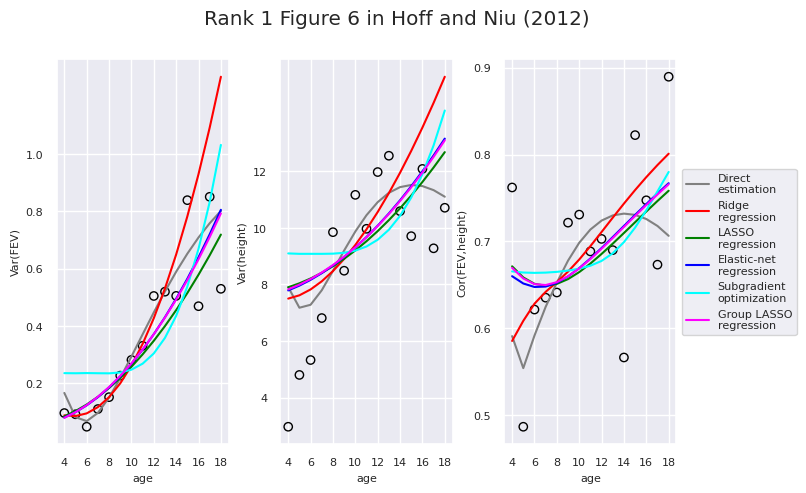

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(8, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
fig.suptitle('Rank 1 Figure 6 in Hoff and Niu (2012)')
axs[0].plot(np.linspace(4, 18, 15), cov_3d[0, 0, :], c='grey')
axs[0].plot(np.linspace(4, 18, 15), cov_3d_ridge[0, 0, :], c='red')
axs[0].plot(np.linspace(4, 18, 15), cov_3d_lasso[0, 0, :], c='green')
axs[0].plot(np.linspace(4, 18, 15), cov_3d_net[0, 0, :], c='blue')
axs[0].plot(np.linspace(4, 18, 15), cov_3d_sub[0, 0, :], c='cyan')
axs[0].plot(np.linspace(4, 18, 15), cov_3d_group[0, 0, :], c='magenta')
fev_var = np.zeros_like(np.linspace(4, 18, 15))
for i, age in enumerate(range(4, 19)):
    fev_var[i] = np.var(np.asarray(peter_hoff_data['fev'])[np.asarray(peter_hoff_data['age']) == age])
axs[0].scatter(np.linspace(4, 18, 15), fev_var, facecolor='none', edgecolor='black')
axs[0].set_xlabel('age', fontsize=8)
axs[0].set_ylabel('Var(FEV)', fontsize=8)
axs[0].set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
axs[0].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
plt.setp(axs[0].get_xticklabels(), fontsize=8)
plt.setp(axs[0].get_yticklabels(), fontsize=8)
box_0 = axs[0].get_position()
axs[0].set_position([box_0.x0 - 0.051, box_0.y0, box_0.width, box_0.height])
axs[1].plot(np.linspace(4, 18, 15), cov_3d[1, 1, :], c='grey')
axs[1].plot(np.linspace(4, 18, 15), cov_3d_ridge[1, 1, :], c='red')
axs[1].plot(np.linspace(4, 18, 15), cov_3d_lasso[1, 1, :], c='green')
axs[1].plot(np.linspace(4, 18, 15), cov_3d_net[1, 1, :], c='blue')
axs[1].plot(np.linspace(4, 18, 15), cov_3d_sub[1, 1, :], c='cyan')
axs[1].plot(np.linspace(4, 18, 15), cov_3d_group[1, 1, :], c='magenta')
height_var = np.zeros_like(np.linspace(4, 18, 15))
for i, age in enumerate(range(4, 19)):
    height_var[i] = np.var(np.asarray(peter_hoff_data['height'])[np.asarray(peter_hoff_data['age']) == age])
axs[1].scatter(np.linspace(4, 18, 15), height_var, facecolor='none', edgecolor='black')
axs[1].set_xlabel('age', fontsize=8)
axs[1].set_ylabel('Var(height)', fontsize=8)
axs[1].set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
axs[1].set_yticks([4, 6, 8, 10, 12])
plt.setp(axs[1].get_xticklabels(), fontsize=8)
plt.setp(axs[1].get_yticklabels(), fontsize=8)
box_1 = axs[1].get_position()
axs[1].set_position([box_1.x0 - 0.051, box_1.y0, box_1.width, box_1.height])
axs[2].plot(np.linspace(4, 18, 15), cov_3d[0, 1, :] / (np.sqrt(cov_3d[0, 0, :]) * np.sqrt(cov_3d[1, 1, :])),
            c='grey', label=textwrap.fill('Direct estimation', 11))
axs[2].plot(np.linspace(4, 18, 15), cov_3d_ridge[0, 1, :] / (np.sqrt(cov_3d_ridge[0, 0, :]) * np.sqrt(cov_3d_ridge[1, 1, :])),
            c='red', label=textwrap.fill('Ridge regression', 11))
axs[2].plot(np.linspace(4, 18, 15),
            cov_3d_lasso[0, 1, :] / (np.sqrt(cov_3d_lasso[0, 0, :]) * np.sqrt(cov_3d_lasso[1, 1, :])),
            c='green', label=textwrap.fill('LASSO regression', 11))
axs[2].plot(np.linspace(4, 18, 15),
            cov_3d_net[0, 1, :] / (np.sqrt(cov_3d_net[0, 0, :]) * np.sqrt(cov_3d_net[1, 1, :])),
            c='blue', label=textwrap.fill('Elastic-net regression', 11))
axs[2].plot(np.linspace(4, 18, 15),
            cov_3d_sub[0, 1, :] / (np.sqrt(cov_3d_sub[0, 0, :]) * np.sqrt(cov_3d_sub[1, 1, :])),
            c='cyan', label=textwrap.fill('Subgradient optimization', 12))
axs[2].plot(np.linspace(4, 18, 15),
            cov_3d_group[0, 1, :] / (np.sqrt(cov_3d_group[0, 0, :]) * np.sqrt(cov_3d_group[1, 1, :])),
            c='magenta', label=textwrap.fill('Group LASSO regression', 11))
fev_height_cov = np.zeros_like(np.linspace(4, 18, 15))
for i, age in enumerate(range(4, 19)):
    fev_height_cov[i] = np.corrcoef(np.asarray(peter_hoff_data['fev'])[np.asarray(peter_hoff_data['age']) == age],
                                    np.asarray(peter_hoff_data['height'])[
                                        np.asarray(peter_hoff_data['age']) == age])[0, 1]
axs[2].scatter(np.linspace(4, 18, 15), fev_height_cov, facecolor='none', edgecolor='black')
axs[2].set_xlabel('age', fontsize=8)
axs[2].set_ylabel('Cor(FEV,height)', fontsize=8)
axs[2].set_xticks([4, 6, 8, 10, 12, 14, 16, 18])
axs[2].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
plt.setp(axs[2].get_xticklabels(), fontsize=8)
plt.setp(axs[2].get_yticklabels(), fontsize=8)
box_2 = axs[2].get_position()
axs[2].set_position([box_2.x0 - 0.051, box_2.y0, box_2.width, box_2.height])
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.show()

Figure 11. Replication of Figure 6 from (Hoff and Niu, 2012, see p. 25) plotting FEV data and variance,
height data and variance, and FEV and height data and correlation as a function of age with RCR alternate
estimate.

### 5.9 Closing Remarks on Lung Capacity versus Physiology as a Cost-Saving Benefit to Insurers

Section 5.1 notes the decrease in costs to insurers from the early detection of a number of degener-
ative lung diseases. Several of the more well-known conditions that affect human lungs are listed
in the introduction to Section 5. The physiological variable that is perceived as the most highly
correlated with most of these conditions is a person’s age. This research has provided a frame-
work for the early detection of the presence of a number of degenerative lung diseases using FEV
measurement (as outlined in Section 5.2) as well as other relevant variables, besides age. With this
framework one can use any number of lifestyle or physiological variables to assess the presence
of outliers in FEV measurements which can lead to early detection and significantly reduce the
costs to insurers through comparatively cheaper early-stage treatment compared against late-stage
treatment or end-of-life therapy.

## 6. Actuarial Case Study 2: Covariance Regression for Hybrid Funded-Unfunded Pension Portfolios using Covariance Forecasting and Risk Premia Parity

In this case study, we begin by noting the risks associated with purely unfunded and purely funded
pension plans in Section 6.1 - the primary quantitative financial risks are also demonstrated in this
case study in Table 1 and Figure 12 with purely funded pensions having higher, less-certain returns
and purely unfunded pensions having significantly lower, more-certain returns. Hybrid pension
schemes are motivated with context concerning the problems arising from changing demographics
in developed nations in Section 6.2.
The RPP portfolio weighting strategy (included in this package) is introduced in Section 6.3
with it being subsequently used to weight the purely funded pensions based on the different
frequency covariance forecasts using the framework given exposition in the previous section,
Section 5. This case study and section is concluded in Section 6.4 where the mean-variance utility
framework of hybrid pension schemes from Dutta et al. (2000) is introduced before we construct
hybrid pension schemes using different risk aversion levels and different frequency forecasts of
the covariance structure of the assets (in the funded portion) for the upcoming investment horizon.

### 6.1 Unfunded and Funded Pension Schemes

Chapman et al. (2001) notes the lower and more certain returns of bond investment (as a proxy
for fully unfunded) versus the higher and less certain returns of equity investment (as a fully
funded pension proxy). Chapman et al. (2001) goes further in noting that employees, the enter-
prise, the stakeholders (shareholders), and the government seldom benefit from the same schemes.
The stakeholders in the company (and the associated share price) should be taken into account
when setting the contribution rates for the unfunded (or defined benefits) portion of the pension
as well as the investment strategies of the companies once funds have been attained. Chapman
et al. (2001) also notes the need for clarity for the employees and company as the funded por-
tion of the pensions are secured versus the relatively unsecured portion of the pension that is
unfunded should there be unforeseen market shocks such as the 2008-2009 financial crisis or the
SARS-CoV-2 pandemic.
Splinter (2017) notes the broader economic benefits of maintaining an at least partially
unfunded pension scheme for state employees in which it provides a stabilising effect on a nation’s
economy by providing governments with funds without needing to either raise taxes or cut bene-
fits. There is a downside risk in that the government (and by extensions the employees) then relies
on the same assumptions of unfunded pensions in that the economy will continue to grow and the
money can be provided or returned at a later date. Splinter (2017) notes that the main contributor
to the under funding of the public employees pensions is the unfunded portions as a result of an increase in state liabilities with an insufficient associated contribution by employees and the gov-
ernment. Whereas, the funded portions properly invested in diversified equity portfolios’ returns
were in excess of expectations. Other causes were noted, but the large accumulation of liabilities
was seen as the main contributor to less-than-favourable defined benefit pension funding.
Grubbs (1999) notes the difficulty experienced by some private firms in adequately funding
defined benefits schemes before adequate legislation and planning was enforced. These failed fully
defined benefit plans (or unfunded pensions) relies upon inadequate contributions from employ-
ees and the companies. These resulted in a number of disastrous instances such as companies
cancelling all their unfunded or defined benefits schemes or only being able to continue paying a
small portion of the retirees at the expense of the future retirees. An extended study on this topic
was conducted in (Trowbridge (1952)).
With the problems with pure funding and unfunded pensions noted above and with the rise
of demographic mismatches in developed populations discussed in the next section, Section 6.2,
Devolder and de Valeriola (2019) notes that neither funded (referred to as defined contributions
or DC) nor unfunded (referred to as defined benefits or DB) are adequate as risk-sharing compro-
mises between generations. This, among other things, motivated the rise of hybrid strategies. The
optimisation in Devolder and de Valeriola (2019) of the ratio of funded to unfunded schemes is
considered from the perspective of minimising the disparity between retirement living conditions
of different generations rather than some risk-returns trade-off of individual investors which is
performed in this case study.
Wang and Lu (2019) studies hybrid pensions strategies to address the problem of risk shar-
ing between generations from a stochastic perspective with adjusted contributions and benefits
depending on the performances of the pensions. Using the stochastic optimal control approach,
closed-form solutions are derived using both a quadratic loss function and an exponential loss
function. Various market parameters are adjusted with the contributions and benefits adjusted
accordingly to demonstrate the effectiveness of risk-sharing between different generations when
compared against purely funded or unfunded plans. Some simplifying assumptions were made
in the analysis (such as assuming mortality rates remained constant over time) to allow the
calculation of closed-form solutions.
Further, Blommestein et al. (2009) notes that hybrid pension strategies perform better for
individual private investors in terms of funding ratios and replacement ratios. The simulations
performed by Blommestein et al. (2009) show that hybrid strategies perform best in terms of
sustainable financial risk-sharing between generations. It is found that in relatively stable envi-
ronments where over-funding of hybrid strategies takes place, the most effective way of sharing
risk is through conditional index-linked investing. It is shown how hybrid plans offer an agreeable
compromise between DB plans with no benefit risk to the individual, but risk to the employer,
and DC plans where the individual bears the entirety of the risk through investment decisions,
inflation, and increased longevity.
Hoevenaars and Ponds (2008) evaluates these hybrid options from the balance sheet perspective
as the sum of embedded generational options. This leads to the conclusion that any policy change
of an individual inevitably leads to the transfer of risk between generations. It is found, maybe
not surprisingly, that shifts in the investment pools of pensions to less risky assets shifts the risks
from older generations to younger generations. Whereas, a shift in weightings between funded
and unfunded within the hybrid strategy from flexible contributions and fixed benefits to fixed
contributions and variable benefits shifts the risk from younger generations to older generations.

### 6.2 Hybrid Funded-Unfunded UK Pension Schemes to Address Demographic Changes

The changing demographics of the more-developed countries in the world (proportionally larger
ageing working populations than developing countries) are putting significant strain on unfunded
or pay-as- you-go (PAYG) pension systems - see Miles (2000). The motivation and evidence for moving away from PAYG pensions is based upon developed economies having efficient mar-
ket portfolios that significantly exceed GDP growth and funded pensions lead to returns that are
more robust to temporal distortions in the availability of working-age people within the popula-
tion. These reasons, while arguably logical, are not in themselves conclusive for transfers from
unfunded to funded pension systems for more developed nations.
Miles (1998) notes that for this shift from unfunded to funded pensions, the population would
need more savings. It is also noted that given the ageing populations and the unfunded pensions
on which they depend, significant leveraged funding would be required by the governments to
fund these shifts in policy or there would naturally be some losers when shifting systems owing
to the funding needing to come from somewhere. It is, however, noted in Miles (1998) that the
UK is further along in this process than most of its mainland Europe counterparts which face
significant difficulties that have no doubt been exacerbated by the 2007–2008 financial crisis and
SARS-CoV-2 Pandemic-induced recessions since the its publication. These demographic changes
and the resulting difficulties they cause for governments in more developed countries to shift from
unfunded to funded pension schemes have given rise to significant literature on the topic such as
Disney (1996), Feldstein (1996), Kotlikoff (1996), Mitchell and Zeldes (1996), Roseveare et al.
(1996), Feldstein and Samwick (1998), and Miles et al. (1999).
Sinn (1999) supports the full or partial shift away from PAYG pension systems as a way or
addressing the growing demographic-related problems in more developed countries by replacing
the loss of labour with capital. These demographic issues (larger ratio of retirees to working age
population, the associated costs of this relative ageing population, and the drastically falling birth
rates) put strain on PAYG systems in a similar manner as pyramids being dependent on a broader
base.
Martell et al. (2013) also notes the difficult decision facing governments when funding pensions
(by matching personal contributions) using debt increases the scheme’s funding ratio which leads
to a country’s credit rating and global perception decreasing. The majority of the dangers of under-
funding pensions for governments are related to the costs associated with an ageing population.
The costs are increasing as a result of the increasing ratio of retirees to the working population,
the increasing life expectancy of retirees, and the increasing healthcare costs associated with an
ageing population living longer.

### 6.3 Equal Risk Premia Parity Weighting Strategy

RPP portfolio weighting strategies, proposed in Maillard et al. (2010), have had empirical suc-
cesses when back-testing on equities over previous financial crises. The risk premia parity weights
are calculated as follows:

\begin{equation} \label{eq:rpp_weight}
\boldsymbol{\omega}_{\text{med}} = \text{argmin}\sum_{j=1}^N\Bigg({\omega_j}\frac{(\mathbf{\Sigma}_{\text{med}}\boldsymbol{\omega})_j}{\boldsymbol{\omega}^T\boldsymbol{\Sigma}_{\text{med}}\boldsymbol{\omega}} - b_j\Bigg),
\end{equation}

with $ \boldsymbol{\omega}_{\text{med}} $ being the risk premia parity weighting vector, $ \mathbf{\Sigma}_{\text{med}} $ being the median of the forecasted covariance, $ N $ being the number of assets, and $ b_j $ being the relative proportion of risk allocated to asset $j$. Only the equal risk premia parity portfolio weighting strategy ($ b_j = \frac{1}{N} $) is explored in this paper and package, with the other constraints being:

\begin{equation}
    \sum_{j=1}^{N}\omega_j=1, \text{ and}
\end{equation}

\begin{equation}
    \sum_{j=1}^{N}\omega_j{I}_{\{\omega_j\geq{0}\}}\geq{k_{\text{long}}} \text{ } \text{ for } k_{\text{long}} \geq 1.3, \text{ and}
\end{equation}

\begin{equation}
    \sum_{j=1}^{N}\omega_j{I}_{\{\omega_j\leq{0}\}}\geq{k_{\text{short}}} \text{ } \text{ for } k_{\text{short}} \leq -0.3.
\end{equation}

The final two constraints are referred to as long/short equity constraints that allow a certain level of shorting ($ k_{\text{short}} $) to finance further long positions. These two weighting strategies are not exhaustive and are included here for context, clarity of case studies in the package, and completeness.

### 6.4 Mean-Variance Utility

We follow the model in Dutta et al. (2000) with the stochastic return of the portfolio over time increment $ t - 1 $ to $ t $ being $ P_t = w_tR_{f,t} + (1 - w_t)R_{u,t} $ with $ w_t $ being the proportion of the portfolio in the diversified RPP portfolio based on either high-, mid-, or low- frequency structures with the stochastic returns of said portfolio being $ R_{f,t} $ and $ R_{u,t} $ being the stochastic returns of the unfunded portion which we approximate with the quarterly UK GDP. The resulting mean-variance utility function is such that:

\begin{equation} \label{eq:utility_function}
    \mathbb{E}[U(P_t)] = \mathbb{E}[P_t] - \frac{\gamma}{2}\mathbb{V}ar(P_t).
\end{equation}

with $ \gamma $ being the risk aversion level to be discussed later. The resulting expected returns and variance of the portfolio are:

\begin{equation}
\begin{split}
    \mathbb{E}[P_t] &= w_t\mathbb{E}[R_{f,t}] + (1 - w_t)\mathbb{E}[R_{u,t}]\\
    &= w_t\mu_{f,t} + (1 - w_t)\mu_{u,t},
\end{split}
\end{equation}

and

\begin{equation}
    \mathbb{V}ar(P_t) = w_t^2\sigma^2_{f,t} + (1 - w_t)^2\sigma^2_{u,t} + w_t(1 - w_t)\sigma_{fu,t},
\end{equation}

respectively, with the realised returns of the funded portfolio over time increment $ t - 1 $ to $ t $ being $ \mu_{f,t} $ (for either the high-, mid, or low-frequency covariance forecasts), the realised returns of the unfunded portfolio over the same increment being $ \mu_{u,t} $, $ \sigma^2_{f,t} $ being the variance of the funded portfolio, $ \sigma^2_{u,t} $ being the variance of the unfunded portion, and $ \sigma_{fu,t} $ being the covariance between the two returns. By taking the derivative of Equation (53) with respect to $ w_t $ and setting to zero it can be shown that:

\begin{equation} \label{eq:weighting}
    w_t = \frac{\mu_{f,t} - \mu_{u,t} + \gamma(\sigma^2_{u,t} - \sigma_{fu,t})}{\gamma(\sigma^2_{f,t} + \sigma^2_{u,t} - 2\sigma_{fu,t})}.
\end{equation}

### 6.5 Different Risk Aversions in FTSE 100 Hybrid Pension Schemes

In this study, we take the daily logarithmic returns of the constituents of the FTSE 100 from 1
October 2003 until 1 April 2023 (where available) to construct RPP portfolios using the high-
, mid-, low-frequency structures to forecast the covariance of the constituents and weight the
portfolios based on these forecasts. The high-, mid-, and low-frequency structures from the daily
logarithmic returns isolated from 1 October 2003 until 31 December 2003 are regressed against
the daily logarithmic returns for the same time series from 1 January 2004 until 31 March 2004.
The high-, mid-, and low-frequency structures isolated from the daily logarithmic returns iso-
lated from 1 January 2004 until 31 March 2004 are then used to forecast the covariance of the
constituents from 1 April 2004 until 30 June 2004. The portfolio is then weighted based on the
median of these daily covariance forecasts using the different frequency structures. The case study
and resulting returns therefore begin from 1 April 2004 in Figure 12. This process is repeated until
the available GDP proxy of the FTSE 100 quarterly returns is exhausted which is 1 April 2023.

<img src="Table_1.png" style="zoom:100%;" />

Table 1. Summary statistics for quarterly returns of purely funded and unfunded pensions using the quarterly
returns of the FTSE 100 as a proxy for unfunded pension schemes.

Rather surprisingly (considering the RPP optimisation focusing on the minimisation of risk) the
RPP portfolios weighted based on the high-, mid-, and low-frequency forecasts of the upcoming
investment period’s covariance structure have higher returns when compared against the FTSE
100 and less desirable variance and value-at-risk (VaR). The cumulative returns of the portfolios,
besides the FTSE 100 proxy, are much more susceptible to market-wide shocks such as those seen
during the 2007–2008 financial crisis and the SARS-CoV-2 Pandemic-induced recession. Based
on the variance, the high-frequency content is more accurate when used to forecast the covariance
than the mid-frequency and low-frequency content, but the VaR indicates that the low-frequency
content is more susceptible to extreme shocks.

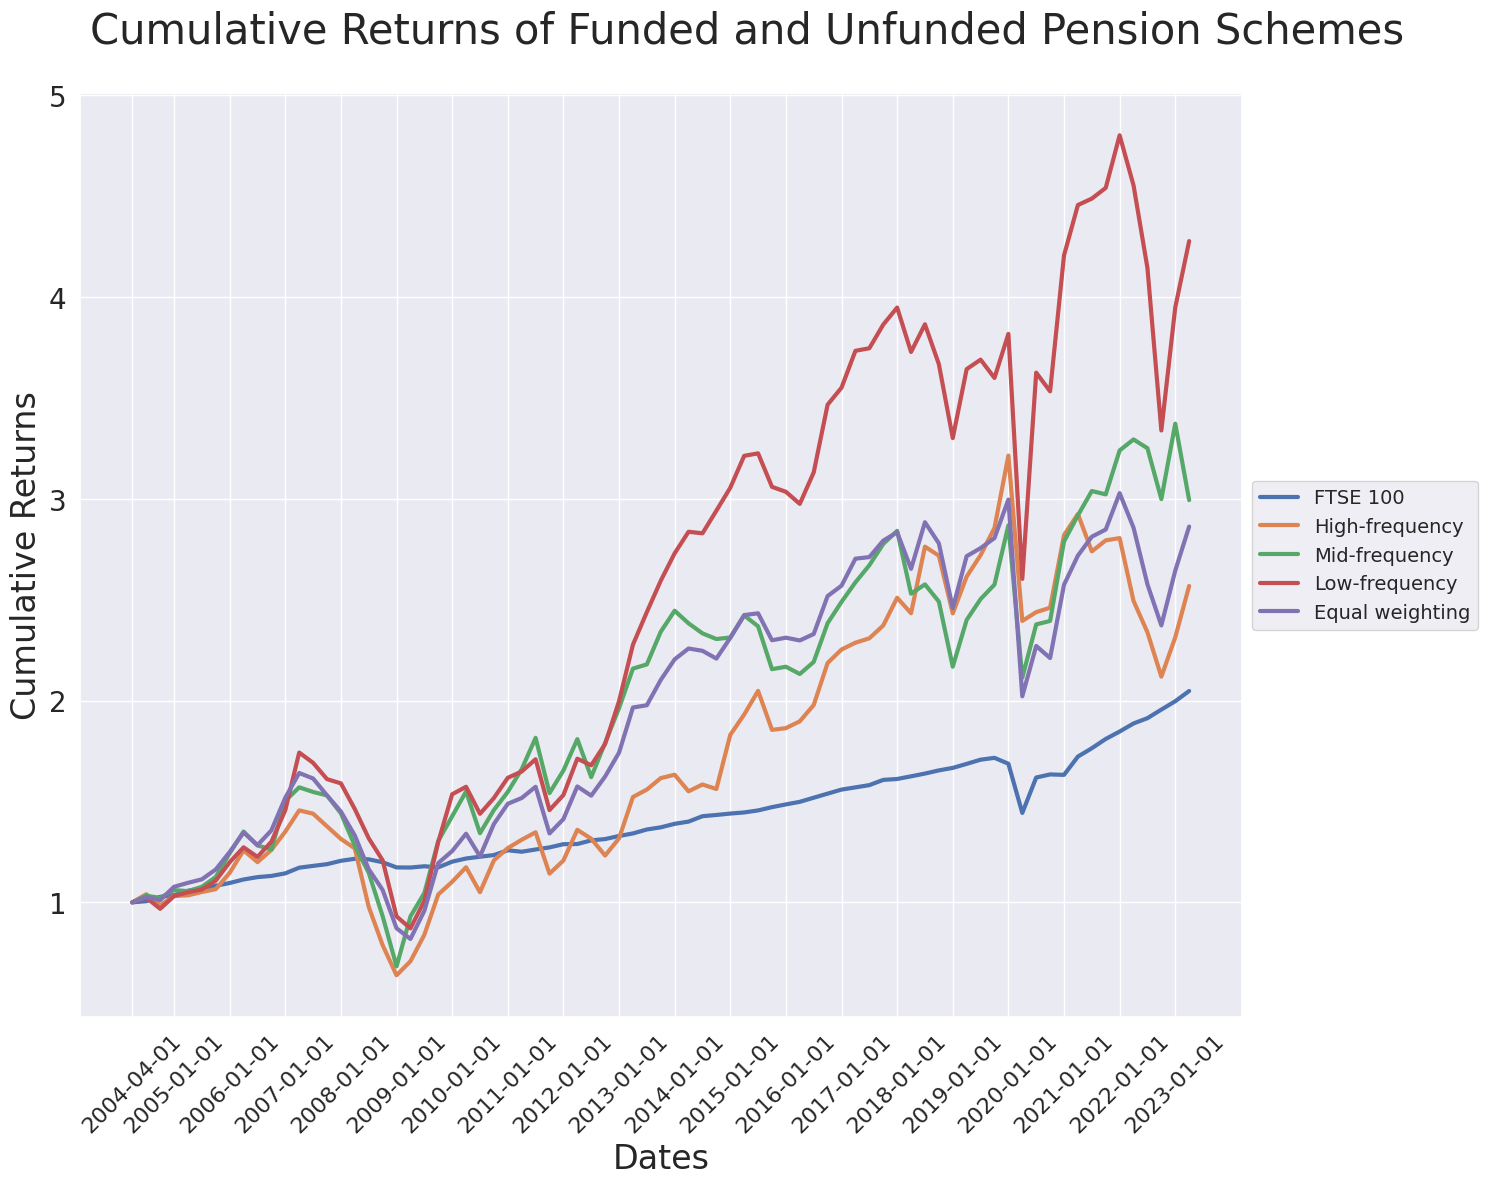

In [19]:
returns_high_storage = pd.read_csv('../FTSE_100_Data/ftse_indices_high_freq_weights.csv', header=0, index_col='DATE')
returns_mid_storage = pd.read_csv('../FTSE_100_Data/ftse_indices_mid_freq_weights.csv', header=0, index_col='DATE')
returns_low_storage = pd.read_csv('../FTSE_100_Data/ftse_indices_low_freq_weights.csv', header=0, index_col='DATE')
returns_equal_storage = pd.read_csv('../FTSE_100_Data/ftse_indices_equal_freq_weights.csv', header=0, index_col='DATE')
returns_gdp_storage = pd.read_csv('../FTSE_100_Data/ftse_indices_gdp_freq_weights.csv', header=0, index_col='DATE')

fig, axs = plt.subplots(1, 1, sharey=True, figsize=(15, 12))
fig.suptitle('Cumulative Returns of Funded and Unfunded Pension Schemes', fontsize=30)
plt.plot(np.exp(np.cumsum(np.append(np.asarray([0]), np.asarray(returns_gdp_storage)[:, 0]))),
         label='FTSE 100', linewidth=3)
plt.plot(np.exp(np.cumsum(np.append(np.asarray([0]), np.asarray(returns_high_storage)[:, 0]))),
         label='High-frequency', linewidth=3)
plt.plot(np.exp(np.cumsum(np.append(np.asarray([0]), np.asarray(returns_mid_storage)[:, 0]))),
         label='Mid-frequency', linewidth=3)
plt.plot(np.exp(np.cumsum(np.append(np.asarray([0]), np.asarray(returns_low_storage)[:, 0]))),
         label='Low-frequency', linewidth=3)
plt.plot(np.exp(np.cumsum(np.append(np.asarray([0]), np.asarray(returns_equal_storage)[:, 0]))),
         label='Equal weighting', linewidth=3)
plt.ylabel('Cumulative Returns', fontsize=24)
plt.xlabel('Dates', fontsize=24)
plt.xticks(np.append([0], np.arange(1, int(len(np.asarray(returns_high_storage)[:, 0]) + 1))[np.arange(2, 76, 4)]),
           np.append(['2004-04-01'], returns_high_storage.index[np.arange(2, 76, 4)]), rotation=45, fontsize=16)
plt.yticks(np.arange(1, 6), fontsize=20)
box_1 = axs.get_position()
axs.set_position([box_1.x0 - 0.07, box_1.y0 + 0.03, box_1.width, box_1.height])
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.savefig('../aas_figures/Funded_and_unfunded_pensions.pdf')
plt.show()

Figure 12. Plot of the cumulative returns of funded and unfunded pensions from 1 April 2004 until 1 April
2023.

Noting the risk aversion level ($\gamma$) in Equation (53) and Equation (56), we see that as the level
of risk aversion is increased sequentially from 1.2 in Table 2 to 1.4 in Table 3 and, finally, to 1.6 in Table 4 the weightings in the respective funded pension portions of the hybrid schemes
decrease. This study indicates that a desirable compromise between the level of acceptable risk
and the expected returns of the pensions can be attained by weighting the funded portions of the
pensions using RPP based on covariance forecasts and increasing or decreasing the risk aversion
level to meet an individual’s need regarding the proportion of the pension scheme to be funded or
unfunded.

<img src="Table_2.png" style="zoom:100%;" />

Table 2. Summary statistics for quarterly returns of hybrid pensions schemes using risk aversion level of $\gamma$ = 1.2.

<img src="Table_3.png" style="zoom:100%;" />

Table 3. Summary statistics for quarterly returns of hybrid pensions schemes using risk aversion level of $\gamma$ = 1.4.

<img src="Table_4.png" style="zoom:100%;" />

Table 4. Summary statistics for quarterly returns of hybrid pensions schemes using risk aversion level of $\gamma$ = 1.6.

### 6.6 Closing Remarks on Hybrid Pensions Schemes

In Section 6.1 we note works that are critical of both purely funded and purely unfunded pen-
sions schemes. In general (depending on the prevailing economic conditions over the lifetime
of the scheme) the funded schemes have higher and less certain returns with the returns of the
unfunded schemes being lower and more certain. Numerous works cited in this section allude to
the necessity for some desirable compromise between these two schemes. Section 6.2 notes not only that hybrid pension schemes would benefit the holders of these schemes, but they would also
address arising demographic issues in the majority of more-developed countries as the shrinking
workforces and growing retired populations are putting siginificant financial strain on traditionally
unfunded pension schemes.
We introduce the RPP weighting strategy in Section 6.3 which we use in this case study to
allocate portfolio weights. The mean-variance utility methodology of hybrid pension schemes
which we use to allocate the ratio of our unfunded portion (using the FTSE 100 as a proxy) and our
funded portion (using difference frequency covariance forecasts) is outlined in Section 6.4. The
construction of the unfunded proxy and the funded portfolios using different frequency forecasts is
given exposition in Section 6.5. We display the results of both purely unfunded and purely funded
pension schemes using mean returns as well as various common portfolio risk measures in Table
1.
We note that the funded portfolios have higher returns as well as significantly higher variances,
VaRs, and CVaRs. This leads to the hybrid pension scheme results in the following tables. By
noting Table 2, Table 3, and Table 4 one can infer that the high-frequency structures used to fore-
cast the forthcoming investment period’s covariance structure are more responsive to changes in
the covariance structures and therefore require a lower relative weighting (when compared against
using mid- and low-frequency structures) in the funded portions of the portfolios to lower the risk
measures such portfolio variance, VaR, and CVar. The mid-frequency structures are less respon-
sive than the high-frequency structures whilst being more responsive than the low-frequency and
constant structures. This forms a hierarchy of performance in both overall returns and the risk
measures.

## 7. Conclusion

In Section 4 several decomposition algorithms are presented. The first of the decomposition algo-
rithms is EMD which had a thorough examination of its algorithmic variations in van Jaarsveldt
et al. (2023) and the associated AdvEMDpy package. X11 is presented in Section 4.3 with several
algorithmic variations already existing, but not presented herein owing to the scope and the focus
of this work being RCR. SSA, originally proposed in Hassani (2007), is presented in Section 4.4.
The algorithmic extensions of SSA developed in this package are given exposition in Supplement
to: Package CovRegpy: Regularised Covariance Regression and Forecasting in Python - these are
decomposing SSA (D-SSA) and Kolmogorov-Smirnov SSA (KS-SSA). SSD was originally pre-
sented in Bonizzi et al. (2014) (presented in Section 4.5 herein) and independent trend analysing
SSA (ITA-SSD) is presented in the supplement which can dynamically adjust the isolation and
extraction of an initial trend to prevent residual portions of trend obscuring the later decomposition
and analysis.

In Section 5, by comparing Figure 8 and Figure 9 with Figure 10 and Figure 11 respectively, one can observe and compare the regularised covariance regression parameter estimation
against the original technique proposed in Hoff and Niu (2012). In addition to standard covariance
regression, LASSO covariance regression, Ridge covariance regression, Elastic-net covariance
regression, Group LASSO covariance regression, and Subgradient covariance regression are also
presented herein and are optional extensions in CovRegpy.py for algorithmic flexibility - see
Sections 5.4, 5.5, 5.6, 5.7, and 5.8. This RCR algorithm and the algorithmic variations developed
in this package are presented within the context of providing actuarial practitioners with a statis-
tical framework for predicting the likelihood of future debilitating lung conditions which can be
easily, and cheaply, treated with genetic testing and early-stage treatment compared against late-
stage diagnosis and costly medical treatment and end-of-life care - this is discussed in Section 5.1
and Section 5.2.

In Section 6 we present a case study which first examines the shortcomings of both purely
funded and purely unfunded pensions - see Section 6.1. After addressing the shortcomings of the
separate strategies, we note that many of the more-developed countries would not only enrich their
citizens by adopting hybrid pension schemes as suitable compromises between the secure returns
of unfunded pensions and the higher returns of the funded pensions, but would also address the
impending drastic demographic changes and their negative effects on the currently prevailing
purely unfunded pension schemes with aging populations and shrinking workforces.

We show, using a case study built on equally weighted sector indices of the FTSE 100 over
a period of approximately 20 years, that purely funded RPP portfolios using high-, mid-, and
low-frequency covariance forecasts outperform unfunded pensions (using the equally weighted
FTSE 100 as a proxy) in terms of absolute returns, but the returns are significantly less certain. By
constructing hybrid RPP portfolios using different risk aversion levels (see Section 6.3 and 6.4)
for each frequency of covariance forecast we note the following:

- high-frequency covariance forecasts are more responsive to changes in the underlying inter-
relationships between the indices;
- mid-frequency covariance forecasts are less responsive than the high-frequency forecasts, but
more responsive than the low-frequency forecasts;
- during periods of strong GDP growth the ideal strategy favours higher frequency covariance
forecasts with a higher proportion of the cumulative portfolio in the unfunded portion; and
- during periods of economic stagnation (lower or no GDP growth) a higher portion of the
pension fund should be directed towards the funded portion which should utilise the lower-
frequency covariance forecasts.

This framework has developed a robust approach to address the impending potentially catastrophic
demographic changes in the more developed nations, the optimal funding ratio strategies dur-
ing periods of varying economic growth, and the optimal frequency of structures to use when
forecasting covariance for the funded portion of portfolios during different economic climates.

Additional algorithmic extensions and forecasting techniques are presented in Supplement to:
Package CovRegpy: Regularised Covariance Regression and Forecasting in Python. One such
technique, named IFF (instantaneous frequency forecasting), is presented in the supplement which
provides a forecasting technique which uses the changes in a structure’s instantaneous amplitude
and instantaneous frequency to predict how its temporal structure continues.

## References

M. Ames, G. Bagnarosa, G. Peters, and P. Shevchenko. 2018. Understanding the Interplay between Covariance Forecasting
Factor Models and Risk-Based Portfolio Allocations in Currency Carry Trades. Journal of Forecasting 37, 8 (2018),
805–831. https://doi.org/10.1002/for.2505

M. Ames, G. Bagnarosa, G. Peters, P. Shevchenko, and T. Matsui. 2017. Forecasting Covariance for Optimal Carry Trade
Portfolio Allocations. In 2017 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP).
IEEE, 5910–5914. https://doi.org/10.1109/ICASSP.2017.7953290

D. Basu and D. Chawla. 2012. An Empirical Test of the Arbitrage Pricing Theory — The Case of Indian Stock Market.
Global Business Review 13, 3 (2012), 421–432. https://doi.org/10.1177/097215091201300

L. Bauwens, S. Laurent, and J. Rombouts. 2006. Multivariate GARCH Models: A Survey. Journal of Applied Econometrics
21, 1 (2006), 79–109. https://doi.org/10.1002/jae.842

S. Bianconcini. 2006. Trend-Cycle Estimation in Reproducing Kernel Hilbert Spaces. Ph. D. Dissertation. Department of
Statistics, University of Bologna, Bologna.

F. Black and M. Scholes. 1973. The Pricing of Options and Corporate Liabilities. Journal of Political Economy 81, 3 (1973),
637–654. https://doi.org/10.1086/260062

H. Blommestein, P. Janssen, N. Kortleve, and J. Yermo. 2009. Moving Beyond the ‘DB vs. DC’ Debate: The Appeal of Hybrid
Pension Plans. Rotman International Journal of Pension Management 2, 2 (2009). https://doi.org/10.2139/ssrn.1493333

P. Bonizzi, J. Karel, O. Meste, and R. Peeters. 2014. Singular Spectrum Decomposition: A New Method for Time Series
Decomposition. Advances in Adaptive Data Analysis 6, 4 (2014), (1450011) 1–34. https://doi.org/10.1142/
S1793536914500113

S. Boyd, E. Busseti, S. Diamond, R. Kahn, K. Koh, P. Nystrup, and J. Speth. 2016. Multi-Period Trading via Convex
Optimization. Foundations and Trends® in Optimization 3, 1 (2016), 1–76. https://doi.org/10.1561/2400000023

S. Braun, G. doPico, A. Tsiatis, E. Horvath, H. Dickie, and J. Rankin. 1979. Farmer’s Lung Disease: Long-Term Clinical and
Physiologic Outcome. American Review of Respiratory Disease 119, 2 (1979), 185–191. https://doi.org/10.1164/arrd.1979.119.2.185

C. Casanova, C. Cote, J. de Torres, A. Aguirre-Jaime, J. Marin, V. Pinto-Plata, and B. Celli. 2005. Inspiratory-to-Total
Lung Capacity Ratio Predicts Mortality in Patients with Chronic Obstructive Pulmonary Disease. American Journal of
Respiratory and Critical Care Medicine 171, 6 (2005), 591–597. https://doi.org/10.1164/rccm.200407-867OC

R. Chapman, T. Gordon, and C. Speed. 2001. Pensions, Funding and Risk. British Actuarial Journal 7, 4 (2001), 605–662.
https://doi.org/10.1017/S1357321700002488

S. Cho and H. Stout-Delgado. 2020. Aging and Lung Disease. Annual Review of Physiology 82 (2020), 433–459. https://doi.org/10.1146/annurev-physiol-021119-034610

E. Dagum. 1980. The X-11-ARIMA Seasonal Adjustment Method. Number Catalogue 12-564E. Statistics Canada, Ottawa,
Canada.

E. Dagum. 1988. The X-11-ARIMA/88 Seasonal Adjustment Method: Foundations and User’s Manual. Statistics Canada,
Ottawa, Canada.

E. Dagum. 1996. A New Method to Reduce Unwanted Ripples and Revisions in Trend-Cycle Estimates from X11ARIMA.
Survey Methodology 22, 1 (1996), 77–83.

E. Dagum and S. Bianconcini. 2006. Local Polynomial Trend-Cycle Predictors in Reproducing Kernel Hilbert Spaces for
Current Economic Analysis. In Anales de Economia Aplicada. 1–16.

E. Dagum and S. Bianconcini. 2008. The Henderson Smoother in Reproducing Kernel Hilbert Space. Journal of Business &
Economic Statistics 26, 4 (2008), 536–545. https://doi.org/10.1198/073500107000000322

J. Darbyshire. 2017. Pricing and Trading Interest Rate Derivatives: A Practical Guide to Swaps (revised ed.). Aitch & Dee
Limited. https://books.google.co.uk/books?id=gOx3tAEACAAJ

A. Dash and D. Grimshaw. 1993. Dread Disease Cover—An Actuarial Perspective. Journal of the Staple Inn Actuarial Society
33, 1 (1993), 149–193. https://doi.org/10.1017/S2049929900010564

E. Derman and I. Kani. 1994. Riding on a Smile - Constructing binomial tree models that are consistent with the volatility
smile effect. Risk 7, 2 (1994), 32–39.

P. Devolder and S. de Valeriola. 2019. Between DB and DC: optimal hybrid PAYG pension schemes. European Actuarial
Journal 9, 2 (2019), 463–482. https://doi.org/10.1007/s13385-019-00216-y

R. Disney. 1996. Can We Afford to Grow Older? A Perspective on the Economics of Aging (1st ed.). MIT Press, Cambridge,
Massachusetts, U.S.A.

M. Doherty. 2001. Applications: The Surrogate Henderson Filters in X-11. Australian & New Zealand Journal of Statistics
43, 4 (2001), 385–392. https://doi.org/10.1111/1467-842X.00187

B. Dumas, J. Fleming, and R. Whaley. 1998. Implied Volatility Functions: Empirical Tests. The Journal of Finance 53, 6
(1998), 2059–2106. https://doi.org/10.1111/0022-1082.00083

B. Dupire. 1994. Pricing with a Smile. Risk 7, 1 (1994), 18–20.

J. Dutta, S. Kapur, and J. Orszag. 2000. A portfolio approach to the optimal funding of pensions. Economics Letters 69, 2
(2000), 201–206. https://doi.org/10.1016/S0165-1765(00)00271-8

C. Dyer. 2012. The interaction of ageing and lung disease. Chronic Respiratory Disease 9, 1 (2012), 63–67. https://doi.
org/10.1177/1479972311433766

B. Dykstra, P. Scanlon, M. Kester, K. Beck, and P. Enright. 1999. Lung Volumes in 4,774 Patients With Obstructive Lung
Disease. Chest 115, 1 (1999), 68–74. https://doi.org/10.1378/chest.115.1.68

J. Efird, H. Landrine, K. Shiue, W. O’Neal, T. Podder, J. Rosenman, and T. Biswas. 2014. Race, insurance type, and
stage of presentation among lung cancer patients. SpringerPlus 3, 710 (2014), 1–7. https://doi.org/10.1186/
2193-1801-3-710

E. Fama and K. French. 1993. Common risk factors in the returns on stocks and bonds. Journal of Financial Economics 33,
1 (1993), 3–56.

E. Fama and K. French. 2004. The Capital Asset Pricing Model: Theory and Evidence. Journal of Economic Perspectives 18,
3 (2004), 25–46. https://doi.org/10.1257/0895330042162430

E. Fama and K. French. 2015. A five-factor asset pricing model. Journal of Financial Economics 116, 1 (2015), 1–22.
https://doi.org/10.1016/j.jfineco.2014.10.010

M. Feldstein. 1996. The Missing Piece in Policy Analysis: Social Security Reform. Technical Report NBER Working Paper,
No. 5413. National Bureau of Economic Research, 1050 Massachusetts Avenue, Cambridge, Massachusetts, U.S.A.
https://doi.org/10.3386/w5413

M. Feldstein and A. Samwick. 1998. The Transition Path in Privatizing Social Security. In Privatizing Social Security,

M. Feldstein (Ed.). University of Chicago Press, 215–264. http://www.nber.org/chapters/c6251

D. Findley, B. Monsell, W. Bell, M. Otto, and B. Chen. 1998. New Capabilities and Methods of the X-12-ARIMA Seasonal-
Adjustment Program. Journal of Business & Economic Statistics 16, 2 (1998), 127–152. https://doi.org/10.1080/
07350015.1998.10524743

K. Fitch, K. Iwasaki, B. Pyenson, C. Plauschinat, and J. Zhang. 2011. Variation in adherence with Global Initiative for Chronic
Obstructive Lung Disease (GOLD) drug therapy guidelines: a retrospective actuarial claims data analysis. Current Medical
Research and Opinion 27, 7 (2011), 1425–1429. https://doi.org/10.1185/03007995.2011.583230

A. French, D. Balfe, J. Mirocha, J. Falk, and Z. Mosenifar. 2015. The inspiratory capacity/total lung capacity ratio as a
predictor of survival in an emphysematous phenotype of chronic obstructive pulmonary disease. International Journal of
Chronic Obstructive Pulmonary Disease (2015), 1305–1312. https://doi.org/10.2147/COPD.S76739

D. Grubbs. 1999. The Public Responsibility of Actuaries in American Pensions. North American Actuarial Journal 3, 4
(1999), 34–41. https://doi.org/10.1080/10920277.1999.10595857

H. Hassani. 2007. Singular Spectrum Analysis: Methodology and Comparison. Journal of Data Science 5, 2 (2007), 239–257.
https://doi.org/10.6339/JDS.2007.05(2).396

R. Henderson. 1916. Note on Graduation by Adjusted Average. Transactions of the Actuarial Society of America 17 (1916),
43–48.

R. Henderson. 1924. A New Method of Graduation. Transactions of the Actuarial Society of America 25 (1924), 29–40.

R. Hoevenaars and E. Ponds. 2008. Valuation of intergenerational transfers in funded collective pension schemes. Insurance:
Mathematics and Economics 42, 2 (2008), 578–593. https://doi.org/10.1016/j.insmatheco.2007.06.007

P. Hoff and X. Niu. 2012. A Covariance Regression Model. Statistica Sinica 22, 2 (2012), 729–753.

N. Huang. 1999. Computer Implemented Empirical Mode Decomposition Method, Apparatus and Article of Manufacture.
Patent. US Patent 5,983,162.

N. Huang, Z. Shen, and S. Long. 1999. A New View of Nonlinear Water Waves: The Hilbert Spectrum. Annual Review of
Fluid Mechanics 31, 1 (1999), 417–457. https://doi.org/10.1146/annurev.fluid.31.1.417

N. Huang, Z. Shen, S. Long, M. Wu, H. Shih, Q. Zheng, N. Yen, C. Tung, and H. Liu. 1998. The empirical mode decomposition and the Hilbert spectrum for nonlinear and non-stationary time series analysis. Proceedings of the Royal Society
of London A: Mathematical, Physical and Engineering Sciences 454, 1971 (1998), 903–995. https://doi.org/10.
1098/rspa.1998.0193

J. Hutchinson. 1846. On the capacity of the lungs, and on the respiratory functions, with a view of establishing a precise
and easy method of detecting disease by the spirometer. Medico-Chirurgical Transactions 29 (1846), 137–252. https://doi.org/10.1177/095952874602900113

B. Jacobs and K. Levy. 1993. Long/Short Equity Investing - Profit from both winners and losers. Journal of Portfolio
Management 20, 1 (1993), 52–63.

I. Jolliffe. 1986. Principal Component Analysis (second ed.). Springer-Verlag, New York, USA, 2002.

L. Kotlikoff. 1996. Privatizing Social Security at Home and Abroad. The American Economic Review 86, 2 (1996), 368–372.
https://www.jstor.org/stable/2118154 Papers and Proceedings of the 108th Annual Meeting of the American
Economic Association, San Francisco, California, U.S.A..

J. Lintner. 1965. Security Prices, Risk, and Maximal Gains from Diversification. The Journal of Finance 20, 4 (1965), 587–
615.

S. Maillard, T. Roncalli, and J. Te ̈ıletche. 2010. The Properties of Equally Weighted Risk Contribution Portfolios. The Journal
of Portfolio Management 36, 4 (2010), 60–70. https://doi.org/10.3905/jpm.2010.36.4.060

H. Markowitz. 1952. Portfolio Selection. The Journal of Finance 7, 1 (1952), 77–91. https://doi.org/10.2307/
2975974

C. Martell, S. Kioko, and T. Moldogaziev. 2013. Impact of Unfunded Pension Obligations on Credit Quality of State
Governments. Public Budgeting & Finance 33, 3 (2013), 24–54. https://doi.org/10.1111/j.1540-5850.2013.
12013.x

I. Mateus, C. Mateus, and N. Todorovic. 2019. Review of new trends in the literature on factor models and mutual fund
performance. International Review of Financial Analysis 63 (2019), 344–354.

D. Miles. 1998. The Implications of Switching from Unfunded to Funded Pension Systems. National Institute Economic
Review 163 (1998), 71–86. https://doi.org/10.1177/002795019816300109

D. Miles. 2000. Funded and Unfunded Pension Schemes: Risk, Return and Welfare. Technical Report Working Paper, No.
239. Center for Economic Studies and ifo Institute (CESifo), CESifo GmbH, Poschingerstr. 5, Munich, Germany. http:
//hdl.handle.net/10419/75591

D. Miles, A. Timmermann, J. de Haan, and M. Pagano. 1999. Risk Sharing and Transition Costs in the Reform of Pension
Systems in Europe. Economic Policy 14, 29 (1999), 253–286. http://www.jstor.org/stable/1344689

O. Mitchell and S. Zeldes. 1996. Social Security Privatization: A Structure for Analysis. Technical Report NBER Working
Paper, No. 5512. National Bureau of Economic Research, 1050 Massachusetts Avenue, Cambridge, Massachusetts, U.S.A.
https://doi.org/10.3386/w5512

J. Musgrave. 1964a. Alternative Sets of Weights for Proposed X-11 Seasonal Factor Curve Moving Averages. Working paper.
U.S. Bureau of the Census, U.S. Department of Commerce, Washington D.C., USA.

J. Musgrave. 1964b. A Set of End Weights to End All End Weights. Working paper. U.S. Bureau of the Census, U.S.
Department of Commerce, Washington D.C., USA.

G. Pasini. 2017. Principal Component Analysis for Stock Portfolio Management. International Journal of Pure and Applied
Mathematics 115, 1 (2017), 153–167. https://doi.org/10.12732/ijpam.v115i1.12

B. Pyenson, C. Henschke, D. Yankelevitz, R. Yip, and E. Dec. 2014. Offering Lung Cancer Screening to High-Risk Medicare
Beneficiaries Saves Lives and Is Cost-Effective: An Actuarial Analysis. American Health & Drug Benefits 7, 5 (2014),
272–282.

B. Pyenson, M. Sander, Y. Jiang, H. Kahn, and J. Mulshine. 2012. An Actuarial Analysis Shows That Offering Lung Cancer
Screening As An Insurance Benefit Would Save Lives At Relatively Low Cost. Health Affairs 31, 4 (2012), 770–779.
https://doi.org/10.1377/hlthaff.2011.0814

E. Qian. 2005. Risk Parity Portfolios: Efficient Portfolios Through True Diversification. White paper. Panagora Asset
Management, Boston, Massachusetts, USA.

D. Roseveare, W. Leibfritz, D. Fore, and E. Wurzel. 1996. Ageing Populations, Pension Systems and Government Budgets:
Simulations for 20 OECD Countries. Technical Report Working Papers, No. 168. Organisation for Economic Co-operation
and Development. https://doi.org/10.1787/463240307711

S. Ross. 1976. The Arbitrage Theory of Capital Asset Pricing. Journal of Economic Theory 13, 3 (1976), 341–360.

M. Rubinstein. 1994. Implied Binomial Trees. The Journal of Finance 49, 3 (1994), 771–818. https://doi.org/10.
1111/j.1540-6261.1994.tb00079.x

W. Sharpe. 1964. Capital Asset Prices: A Theory of Market Equilibrium under Conditions of Risk. The Journal of Finance
19, 3 (1964), 425–442. https://doi.org/10.1111/j.1540-6261.1964.tb02865.x

J. Shiskin, A. Young, and J. Musgrave. 1967. The X-11 Variant of the Census Method II Seasonal Adjustment Program.
Technical Report 15. U.S. Department of Commerce, Washington D.C.

H. Sinn. 1999. Pension Reform and Demographic Crisis: Why a Funded System is Needed and Why it is Not Needed.
Technical Report Working Paper, No. 195. Center for Economic Studies and ifo Institute (CESifo), CESifo GmbH,
Poschingerstr. 5, Munich, Germany.

A. Smith. 1776. An Inquiry into the Nature and Causes of the Wealth of Nations.

D. Splinter. 2017. State pension contributions and fiscal stress. Journal of Pension Economics & Finance 16, 1 (2017), 65–80.
https://doi.org/10.1017/S1474747215000189

A. Sutcliffe. 1993. X11 time series decomposition and sampling errors. Australian Bureau of Statistics.

J. Tobin. 1958. Liquidity Preference as Behavior Towards Risk. The Review of Economic Studies 25, 2 (1958), 65–86.

C. Trowbridge. 1952. Fundamentals of Pension Funding. Transactions of the Society of Actuaries 4, 17 (1952), 17–43.

C. van Jaarsveldt, M. Ames, G. Peters, and M. Chantler. 2023. Package AdvEMDpy: Algorithmic variations of empir-
ical mode decomposition in Python. Annals of Actuarial Science (2023), 1–37. https://doi.org/10.1017/
S1748499523000088

C. van Jaarsveldt, G. Peters, M. Ames, and M. Chantler. 2021. Tutorial on Empirical Mode Decomposition: Basis
Decomposition and Frequency Adaptive Graduation in Non-Stationary Time Series. Available at SSRN 3913330 (2021).
https://doi.org/10.2139/ssrn.3913330

R. Vautard, P. Yiou, and M. Ghil. 1992. Singular-spectrum analysis: A toolkit for short, noisy chaotic signals. Physica D:
Nonlinear Phenomena 58, 1-4 (1992), 95–126. https://doi.org/10.1016/0167-2789(92)90103-T

S. Wang and Y. Lu. 2019. Optimal investment strategies and risk-sharing arrangements for a hybrid pension plan. Insurance:
Mathematics and Economics 89 (2019), 46–62. https://doi.org/10.1016/j.insmatheco.2019.09.005

E. Whittaker. 1922. On a New Method of Graduation. Proceedings of the Edinburgh Mathematical Society 41 (1922), 63–75.
https://doi.org/10.1017/S0013091500077853

H. Yang, M. Beymer, and S. Suen. 2019. Chronic Disease Onset Among People Living with HIV and AIDS in a
Large Private Insurance Claims Dataset. Scientific Reports 9, 18514 (2019), 1–8. https://doi.org/10.1038/
s41598-019-54969-3

L. Yang. 2015. An Application of Principal Component Analysis to Stock Portfolio Management. Master’s Thesis. University
of Canterbury, Department of Economics and Finance, 20 Kirkwood Avenue, Upper Riccarton, Christchurch 8041, New
Zealand. https://doi.org/10.26021/5235